## Econ 52 Business Cycle Class noteboook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime

In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [3]:
import data_load

Function to take best linear fit, decadal average growth

In [4]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [5]:
series = data_load.get_fred_data('Q','own_def')

In [6]:
stateu = data_load.get_state_u_data('Q')

#### Sample selection

In [7]:
series=series.loc['1952-03-31':'2020-12-31']
series.tail()

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,w,u,USREC,k,ypotn,ypot,totres,ioer,dgs10,breakeven10
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,21902.390,14667.964,3865.345,3885.228,-516.146,3048.089,2531.943,20951.088,14093.877,3652.085,...,108.830,3.600000,0.000000,69059464.0,21742.100345,19247.215240,1613.533333,1.631522,1.791935,1.638548
2020-03-31,21706.513,14473.122,3943.653,3807.759,-518.021,2934.121,2416.101,20665.553,13862.295,3691.924,...,111.521,3.800000,0.333333,69059464.0,21931.129475,19336.519436,1847.166667,1.254396,1.365000,1.428226
2020-06-30,19913.143,13168.944,4021.065,3254.272,-531.137,2342.488,1811.351,19034.830,12668.716,3768.904,...,117.932,12.966667,0.333333,69059464.0,21942.395438,19419.266353,3071.600000,0.100000,0.687619,1.166508
2020-09-30,21647.640,14456.175,3995.986,3891.227,-695.747,2802.324,2106.577,20511.785,13793.919,3709.691,...,116.110,8.833333,0.000000,69059464.0,22213.389508,19490.371350,2790.333333,0.100000,0.650625,1.589219
2020-12-31,22024.502,14726.685,4018.324,4040.153,-760.659,3027.081,2266.421,20724.128,13982.930,3691.493,...,119.027,6.766667,0.000000,69059464.0,22448.827497,19573.103807,3015.433333,0.100000,0.864516,1.781613


#### Construct extra variables

In [8]:
NQ=series.index.size # Number of quarters in data
series['ypop']=series['y']/series['pop'] # Output per person
series['t']=np.arange(0,NQ) # Output per person

In [9]:
print('Total quarters = ', NQ)

Total quarters =  276


#### Let's start with GDP

Start by looking at US log real GDP since 1952

Text(0.5, 1.0, 'U.S. real GDP ($Y_t$)')

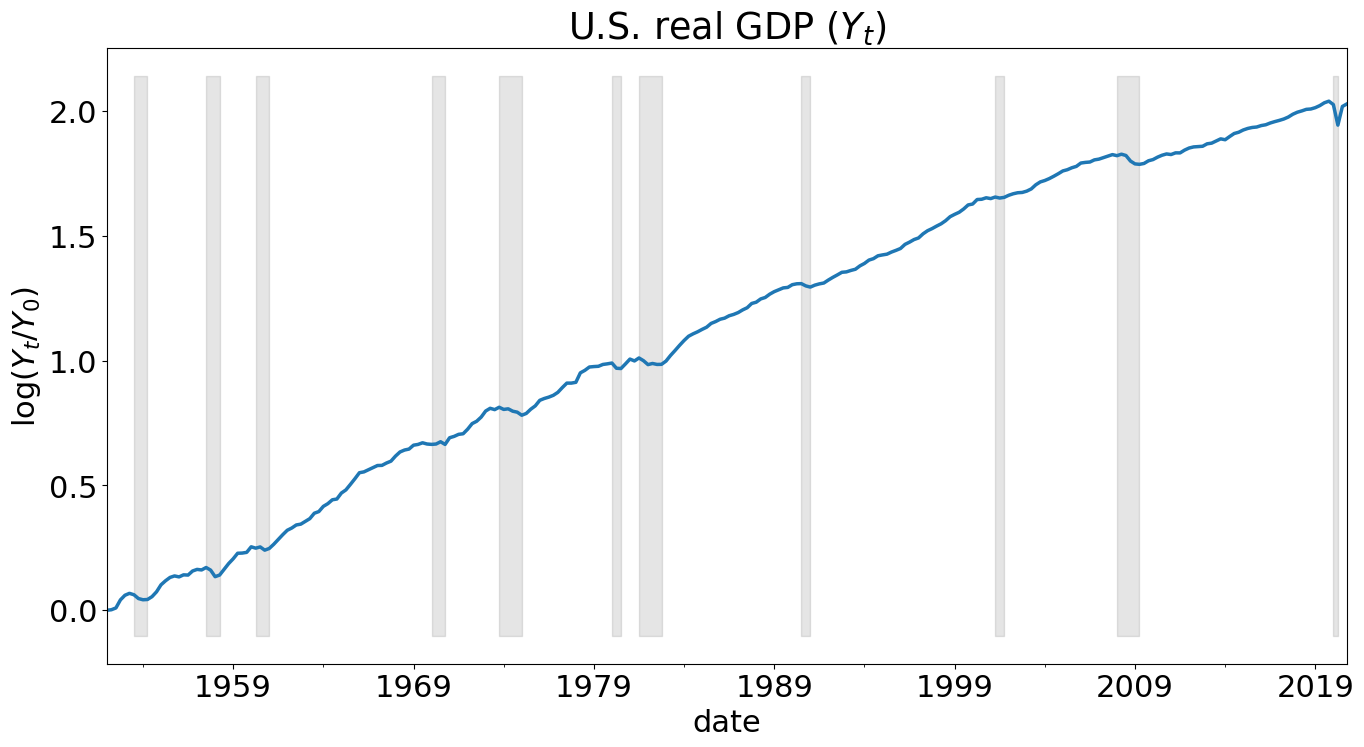

In [11]:
(np.log(series['y'])-np.log(series['y'][0])).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. real GDP ($Y_t$)')
#########plt.savefig(f'Export/us_log_gdp.pdf', format='pdf', transparent=True);

Over 70 years, we've grown by 2 log points, since $e^2=7.4$, we've multiplied real GDP by 7.5

In [12]:
np.exp(2)

7.38905609893065

In [13]:
print(' Real GDP at beginning = $trn ', series['y'][0], ' | end = $trn ', series['y'][-1]) 

 Real GDP at beginning = $trn  2727.954  | end = $trn  20724.128


What's the annual log growth rate? $\frac{\log(x_T)-\log(x_0)}{T/4}$

In [14]:
print('Annualized log growth rate =',(np.log(series['y'][-1])-np.log(series['y'][0]))/(NQ/4))

Annualized log growth rate = 0.029387634024323605


In [15]:
decadal_average_growth(series['y'])

Average for 1950/60 : 0.037
Average for 1970/80 : 0.032
Average for 2000/10 : 0.0206


What's the standard deviation? 

In [16]:
print('Mean growth rate real GDP =',4*np.average(np.diff(np.log(series['y']))))
print('Mean growth rate nominal GDP =',4*np.average(np.diff(np.log(series['yn']))))
print('Standard dev of growth rate real GDP =',4*np.std(np.diff(np.log(series['y']))))
print('Standard dev of growth rate nominal GDP =',4*np.std(np.diff(np.log(series['yn']))))

Mean growth rate real GDP = 0.029494498148048415
Mean growth rate nominal GDP = 0.059844464486844925
Standard dev of growth rate real GDP = 0.04440395179225056
Standard dev of growth rate nominal GDP = 0.049156348626978354


Alternative is regression

In [17]:
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

In [18]:
print('Best fit log growth rate (annual) =', regparams['t']*4)

Best fit log growth rate (annual) = 0.030545429540048113


Text(0.5, 1.0, 'U.S. real GDP ($Y_t$)')

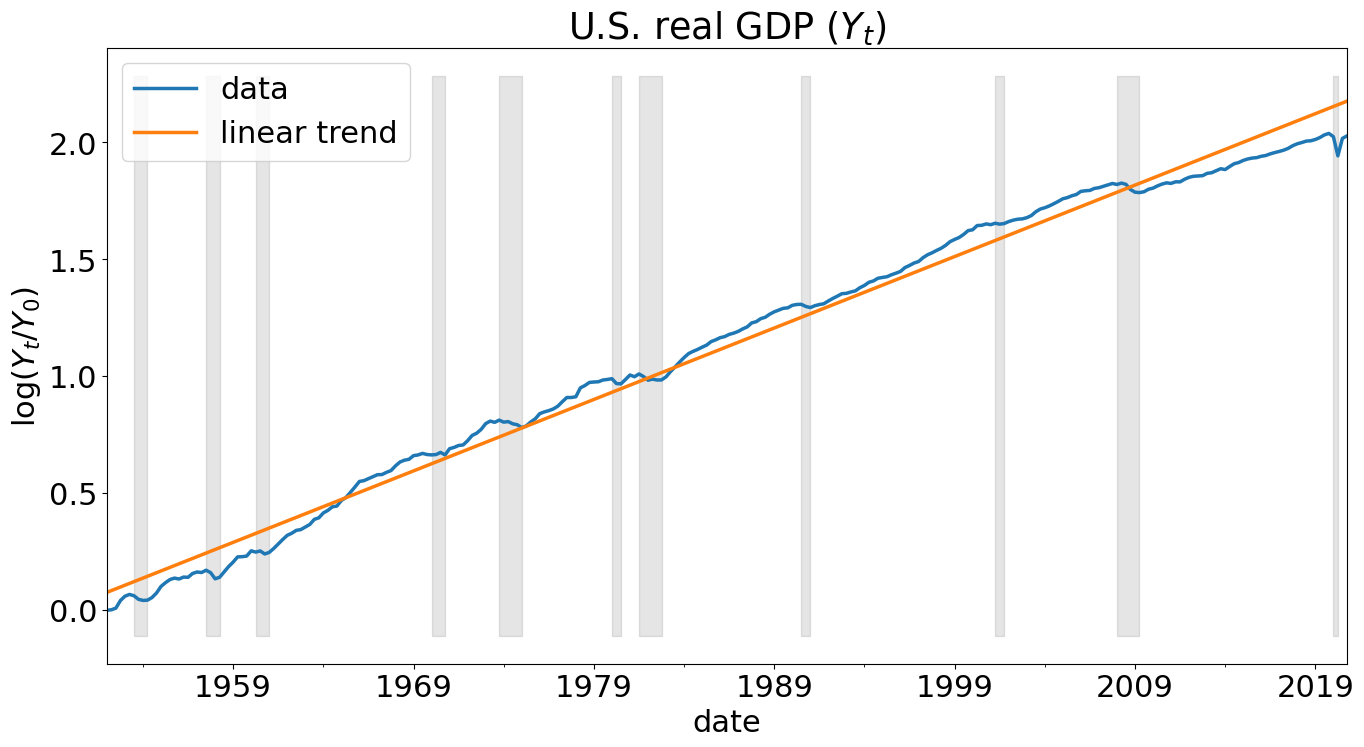

In [19]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='data')
(series['ylogfit']-np.log(series['y'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$)')

#### Examine the role of pop

In [20]:
series['poplogfit'], regparams=reg_fit(np.log(series['pop']), series['t'], verbose=False)

Text(0.5, 1.0, 'U.S. population ($pop_t$)')

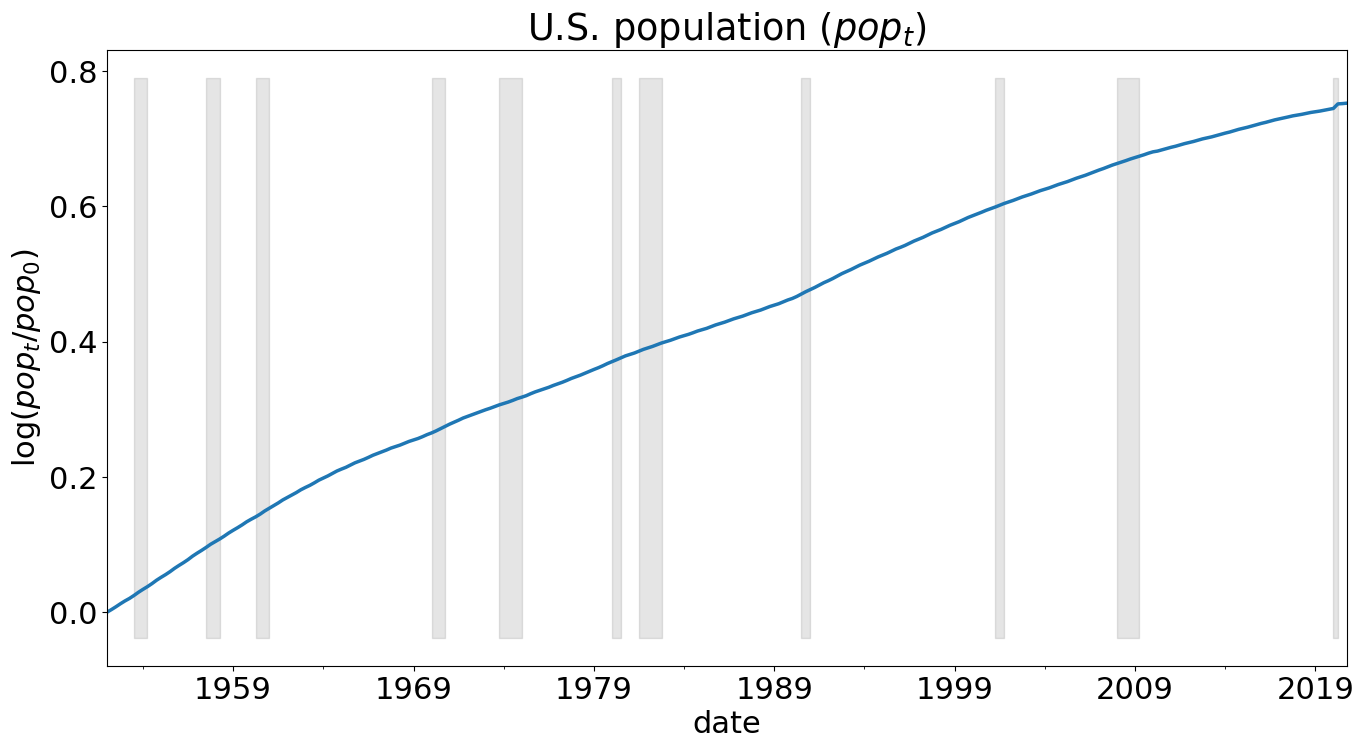

In [22]:
(np.log(series['pop'])-np.log(series['pop'][0])).plot()
#(series['poplogfit']-np.log(series['pop'][0])).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(pop_t/pop_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. population ($pop_t$)')
#########plt.savefig(f'Export/us_log_pop.pdf', format='pdf', transparent=True);

In [23]:
print('Annualized log growth rate of pop=',(np.log(series['pop'][-1])-np.log(series['pop'][0]))/(NQ/4))
print('Best fit log growth rate of pop (annual) =', regparams['t']*4)

Annualized log growth rate of pop= 0.010900045867279398
Best fit log growth rate of pop (annual) = 0.010703592911509976


In [24]:
decadal_average_growth(series['pop'])

Average for 1950/60 : 0.0146
Average for 1970/80 : 0.0106
Average for 2000/10 : 0.0079


In [25]:
(np.log(series['pop'][-1])-np.log(series['pop'][0]))

0.7521031648422785

In [26]:
np.exp(0.75)

2.117000016612675

In [27]:
series['pop'][0]

156522.33333333334

In [28]:
series['pop'][-1]

332055.41566666664

#### Now do this in per person basis

In [29]:
series['ypoplogfit'], regparams=reg_fit(np.log(series['ypop']), series['t'], verbose=False)

Text(0.5, 1.0, 'U.S. real GDP per person ($Y_t/pop_t$)')

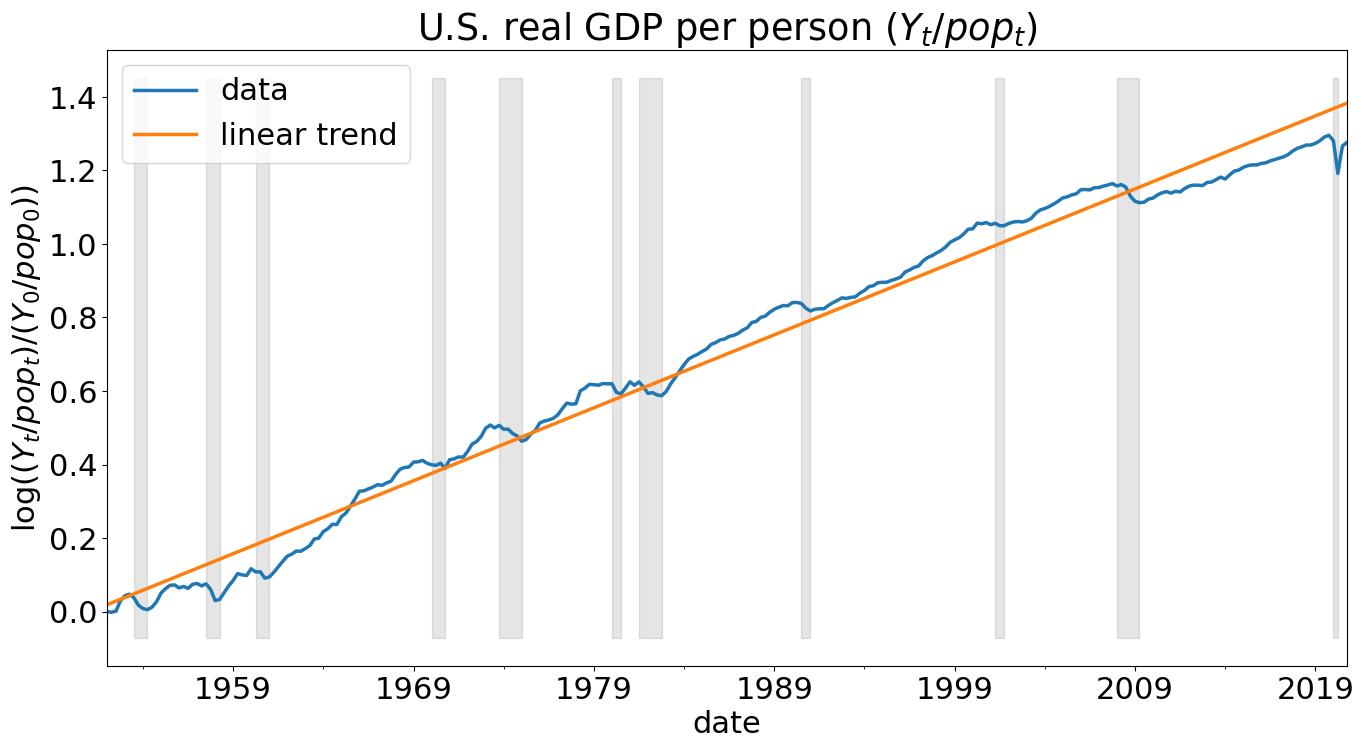

In [31]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log((Y_t/pop_t)/(Y_0/pop_0))$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP per person ($Y_t/pop_t$)')
#########plt.savefig(f'Export/us_log_realgdp_trend.pdf', format='pdf', transparent=True);

In [32]:
print('Annualized log growth rate of GDP/person=',(np.log(series['ypop'][-1])-np.log(series['ypop'][0]))/(NQ/4))
print('Best fit log growth rate of y/pop (annual) =', regparams['t']*4)
decadal_average_growth(series['ypop'])

Annualized log growth rate of GDP/person= 0.018487588157044193
Best fit log growth rate of y/pop (annual) = 0.019841836628538057
Average for 1950/60 : 0.0224
Average for 1970/80 : 0.0214
Average for 2000/10 : 0.0127


Now HP filter instead

In [33]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

Text(0.5, 1.0, 'US log real GDP per person')

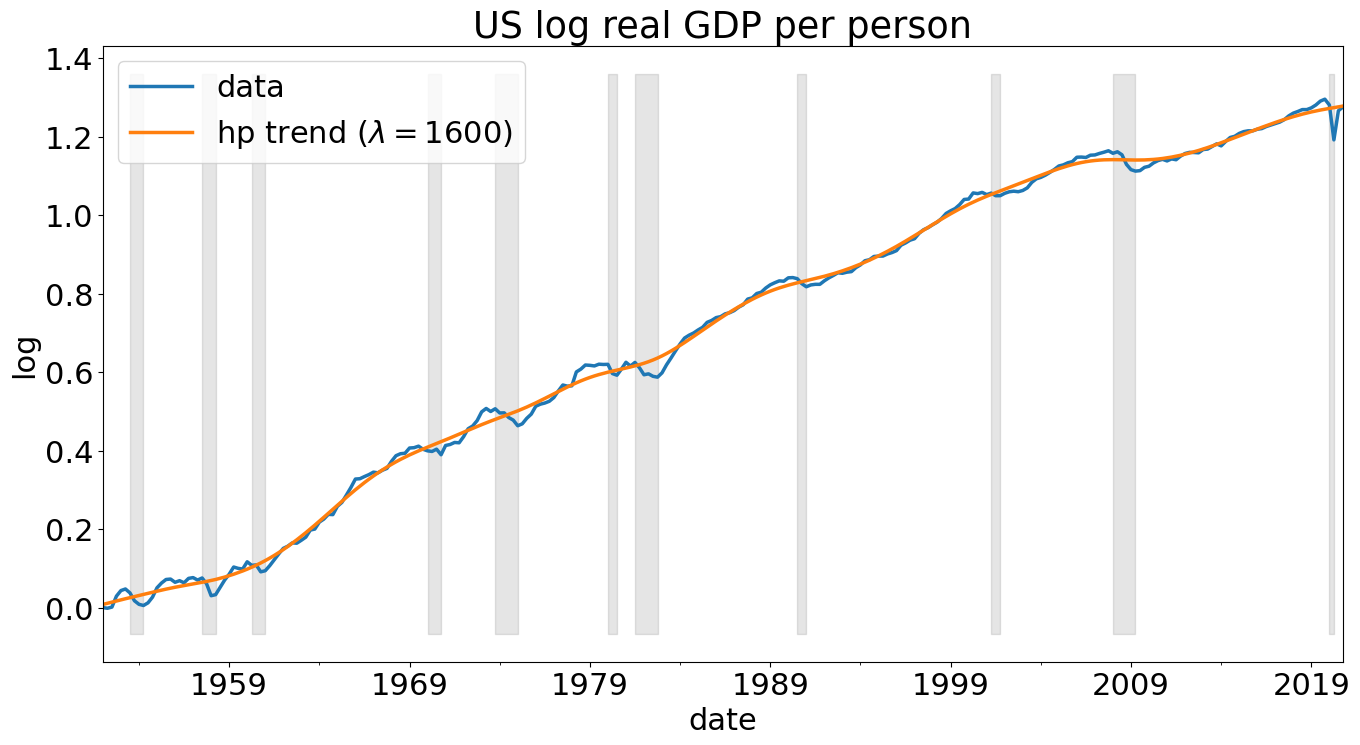

In [35]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US log real GDP per person')
#########plt.savefig(f'Export/us_log_realgdp_hptrend.pdf', format='pdf', transparent=True);

Text(0.5, 1.0, 'Cyclical component of US log real GDP per person')

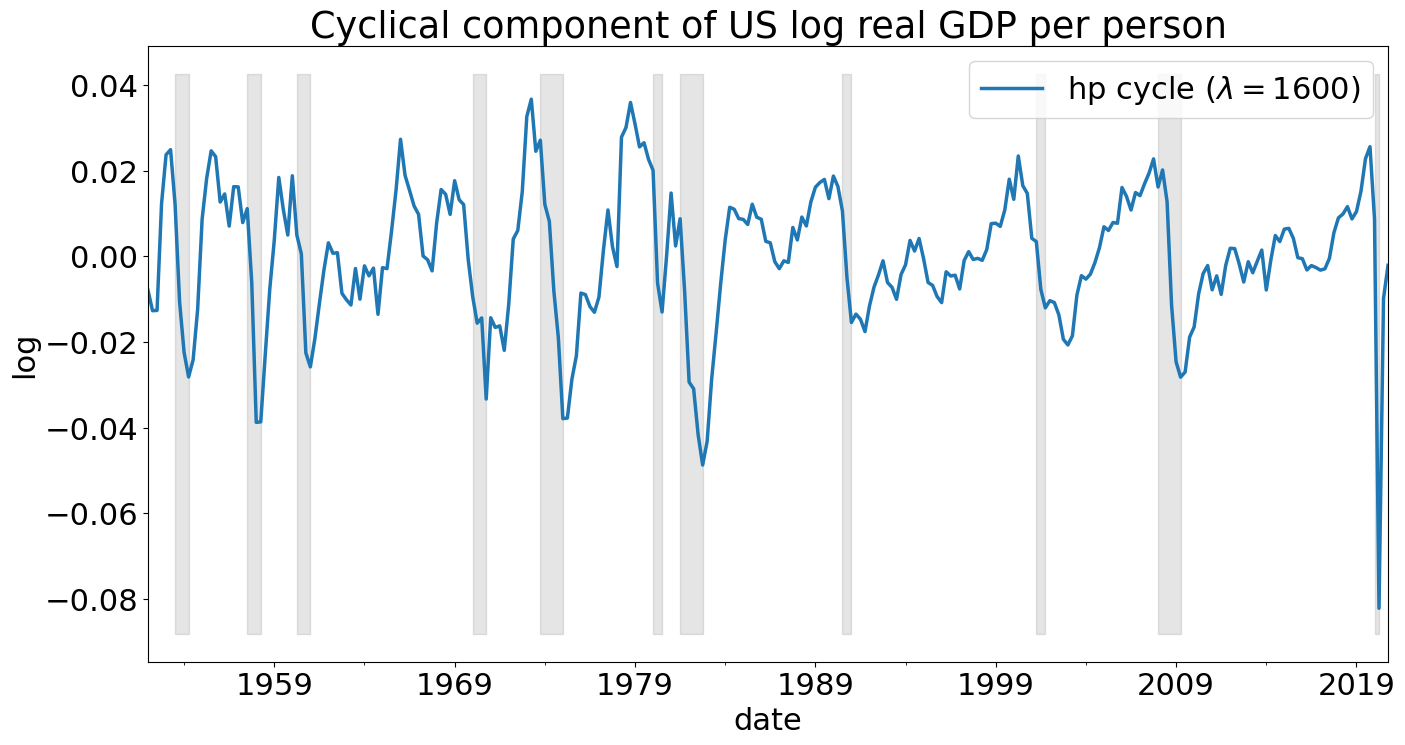

In [37]:
cycle_ypop.plot(label=r'hp cycle ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('log')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('Cyclical component of US log real GDP per person')
#########plt.savefig(f'Export/us_log_realgdp_cycle.pdf', format='pdf', transparent=True);

Real GDP per capita falls from 2% above trend to 3% below trend, so about 5%

Note: if we use linear instead then we are almost 15% below trend now

### Unemployment, Okun's law, basic correlations between growth rates

Text(0.5, 1.0, 'U.S. unemployment ($u_t$)')

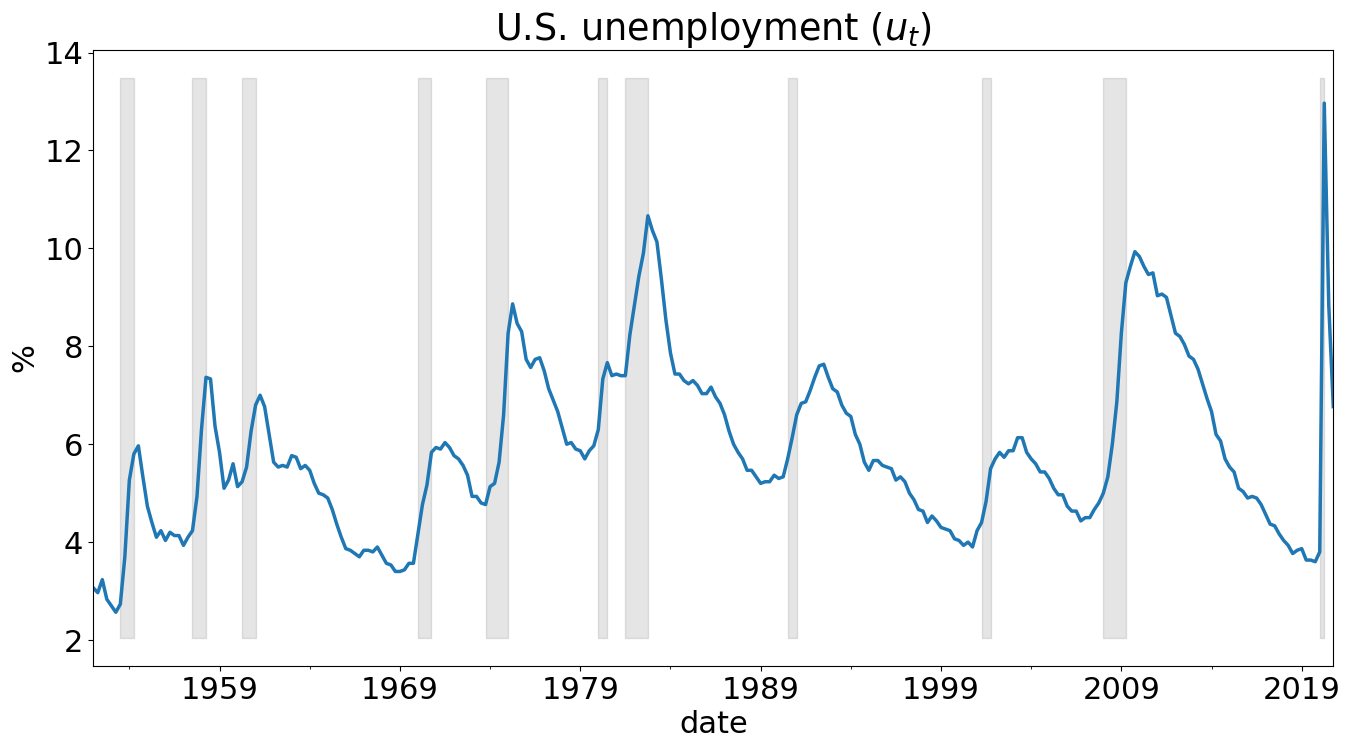

In [39]:
series['u'].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'U.S. unemployment ($u_t$)')
#########plt.savefig(f'Export/us_unempl.pdf', format='pdf', transparent=True);

### Across selected states

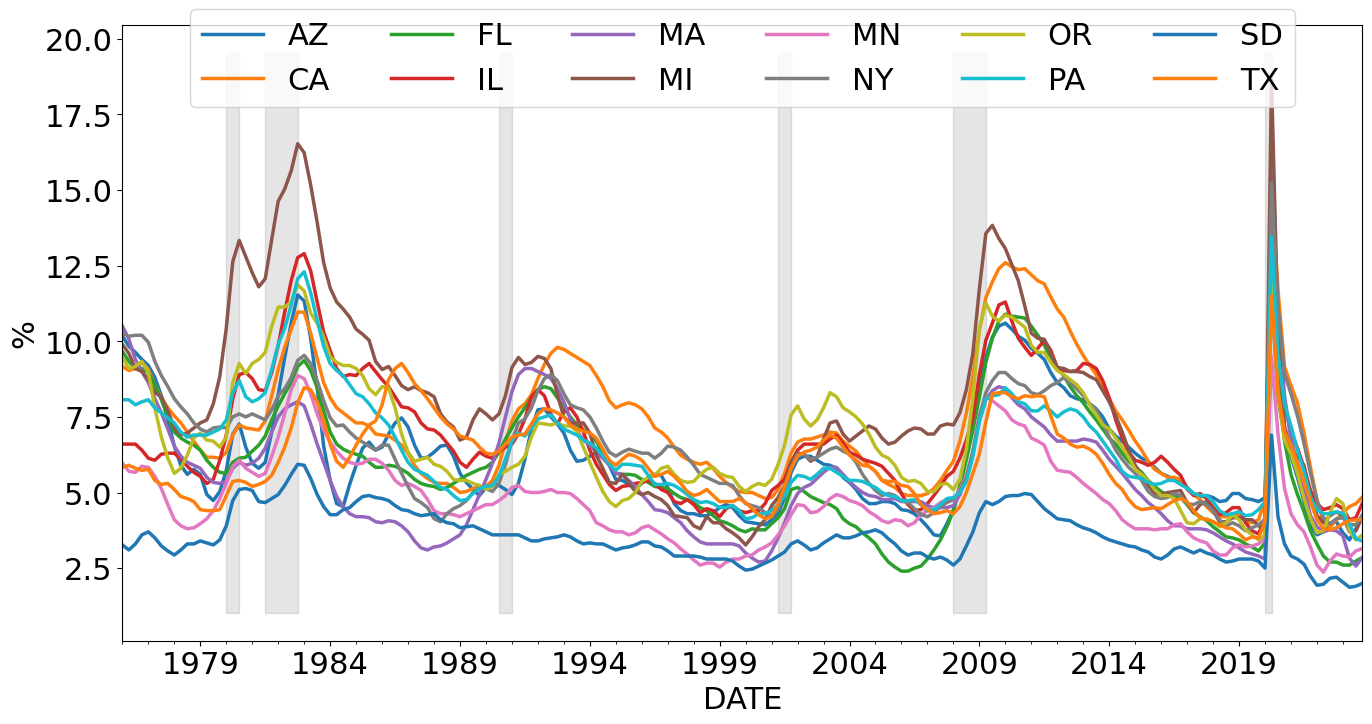

In [45]:
stateu[["AZ","CA","FL","IL","MA","MI","MN","NY","OR","PA","SD","TX"]].plot()
yl, yh = plt.ylim()
plt.ylabel('%')
#plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
#plt.legend(loc='upper center',  ncol=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=6)
#########plt.savefig(f'Export/us_unempl_state.pdf', format='pdf', transparent=True);

Add national unemployment series to dataframe, take growth of u

In [46]:
stateu["nat"]=series['u']
# Last row of corr gives correlation with "nat"
natcorr=stateu.diff().iloc[1:].corr().iloc[-1]

Text(0.5, 1.0, 'Correlation between national $\\Delta u$ and state $\\Delta u$')

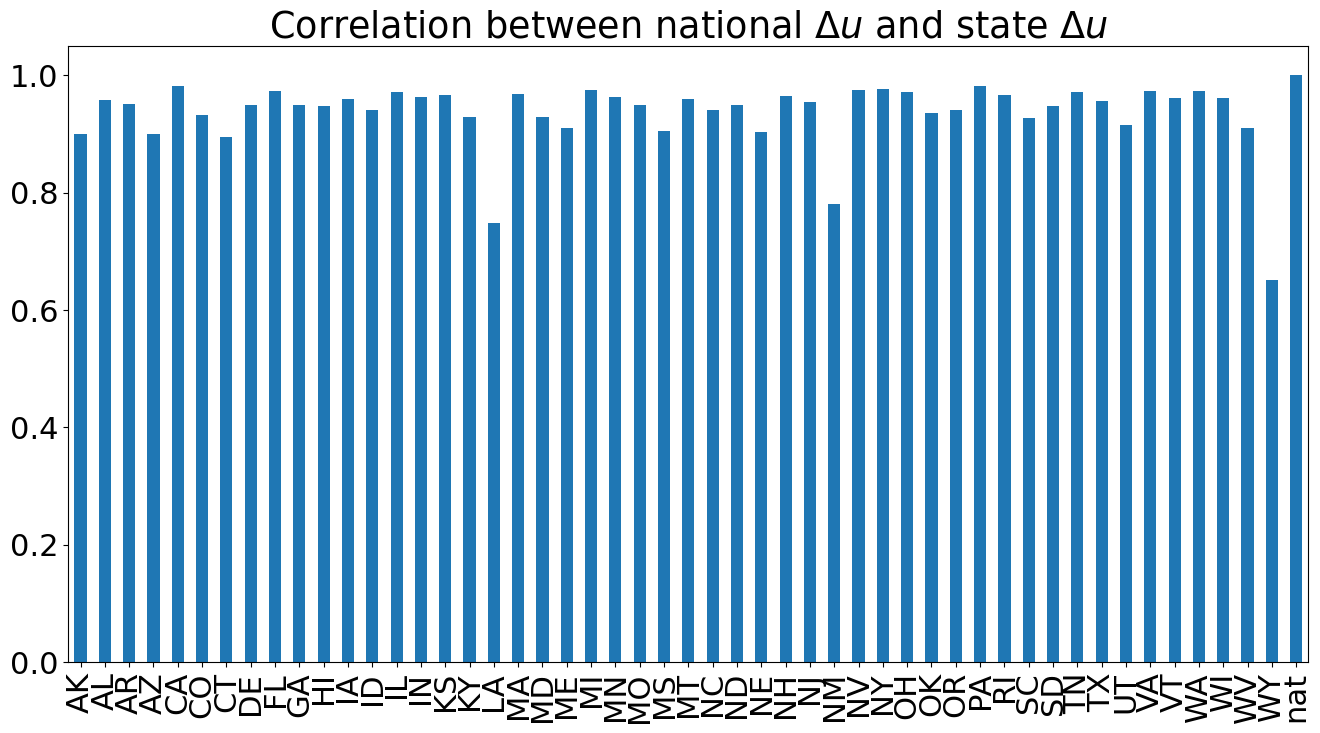

In [47]:
natcorr.plot.bar(rot=90)
plt.title('Correlation between national $\Delta u$ and state $\Delta u$')

In [48]:
# Pre-covid
seriespre=series.loc['1952-03-31':'2019-12-31']

Okun's law: change in unemployment rate vs GDP growth rate

Chad does this with unemployment gap vs output gap, but requires measures of natural rates, so not good for me. He says 
$$ u-\overline{u} = -1/2 (\log(y/ypot)) $$

Text(0.5, 1.0, 'Change in unemployment $\\Delta u_t$ vs growth in GDP $\\Delta \\log Y_t$')

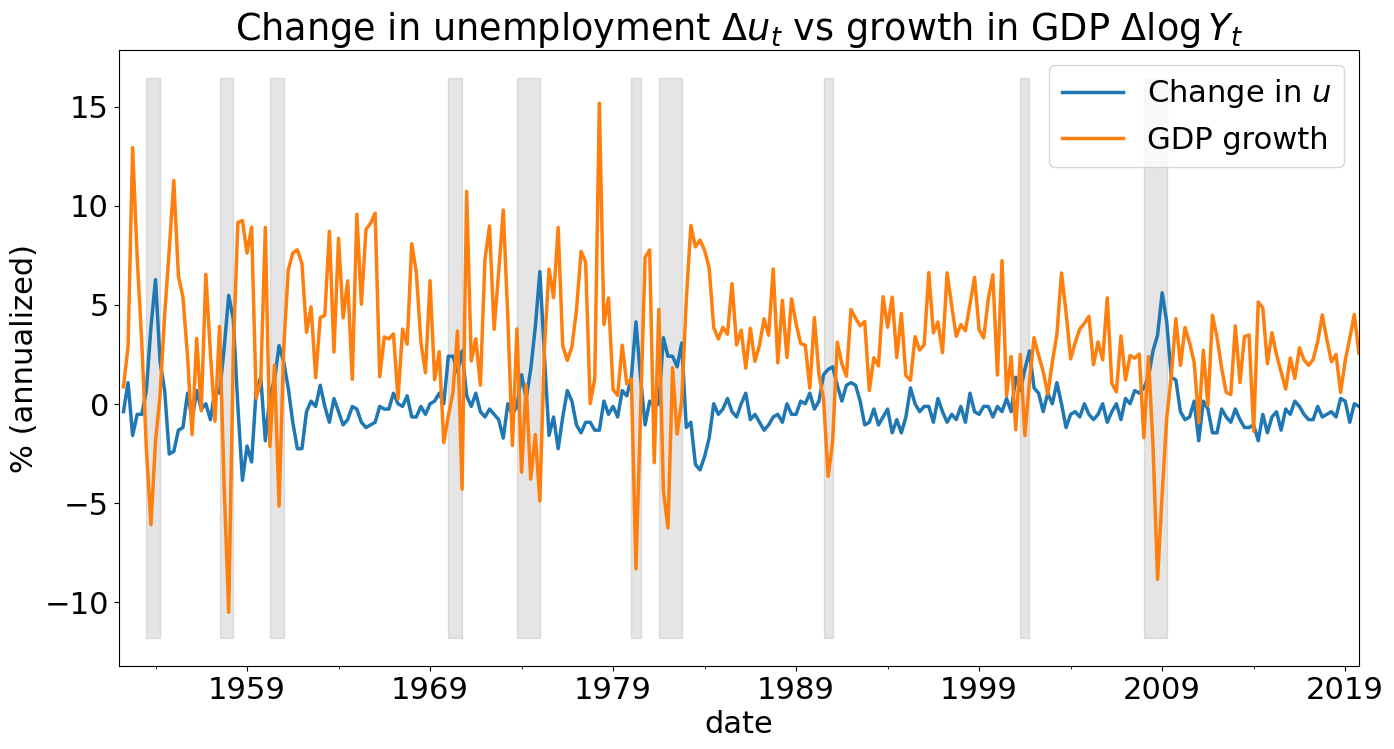

In [50]:
du=seriespre['u'].diff() # change in the unemployment rate in pp
dy=100*np.log(seriespre['y']).diff() # change in GDP in %
dc=100*np.log(seriespre['c']).diff() # change in GDP in %
di=100*np.log(seriespre['i']).diff() # change in GDP in %
dg=100*np.log(seriespre['g']).diff() # change in GDP in %
de=100*np.log(seriespre['emp']).diff() # employment 
dh=100*np.log(seriespre['h']).diff() # employment = total hours
dn=100*np.log(seriespre['h']*seriespre['emp']).diff() # hours worked per person * employment = total hours
dk=100*np.log(seriespre['k']).diff() 

duann=4*du #-du.mean()
dyann=4*dy #-dy.mean()
dcann=4*dc
diann=4*di
dgann=4*dg
dnann=4*dn
dkann=4*dk
deann=4*de
dhann=4*dh



duann.plot(label=r'Change in $u$')
dyann.plot(label=r'GDP growth')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel('% (annualized)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title(r'Change in unemployment $\Delta u_t$ vs growth in GDP $\Delta \log Y_t$')
#########plt.savefig(f'Export/okun_timeseries.pdf', format='pdf', transparent=True);

Look at correlation: -0.8

In [51]:
duy=pd.DataFrame(data={'du':duann[1:],'dy':dyann[1:], 'dc':dcann[1:], 'di':diann[1:], 'dg':dgann[1:], 'dn':dnann[1:], 'dk':dkann[1:], 'de':deann[1:], 'dh':dhann[1:]})
duy.corr()

,du,dy,dc,di,dg,dn,dk,de,dh
du,1.000000,-0.669189,-0.506374,-0.629174,-0.062962,-0.812915,-0.133065,-0.821669,-0.412855
dy,-0.669189,1.000000,0.701820,0.813584,0.244124,0.759301,0.334590,0.691488,0.522665
dc,-0.506374,0.701820,1.000000,0.337645,0.103813,0.557887,0.397920,0.523501,0.356179
di,-0.629174,0.813584,0.337645,1.000000,-0.068831,0.682632,0.156818,0.595986,0.516203
dg,-0.062962,0.244124,0.103813,-0.068831,1.000000,0.067086,0.175922,0.108078,-0.038553
dn,-0.812915,0.759301,0.557887,0.682632,0.067086,1.000000,0.327955,0.914118,0.682170
dk,-0.133065,0.334590,0.397920,0.156818,0.175922,0.327955,1.000000,0.407089,0.030216
de,-0.821669,0.691488,0.523501,0.595986,0.108078,0.914118,0.407089,1.000000,0.327123
dh,-0.412855,0.522665,0.356179,0.516203,-0.038553,0.682170,0.030216,0.327123,1.000000


Regression coefficient: -1.66 (vs simplest model would be $-\alpha$)

In [52]:
# model=sm.OLS(duy['dy'],duy['du'])
# results = model.fit()
# print(results.summary())
# fitted = model.fit().predict()

fitted, regparams=reg_fit(duy['dy'],duy['du'], verbose=True)


                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     218.2
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.48e-36
Time:                        14:39:54   Log-Likelihood:                -644.35
No. Observations:                 271   AIC:                             1293.
Df Residuals:                     269   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0218      0.159     19.000      0.0

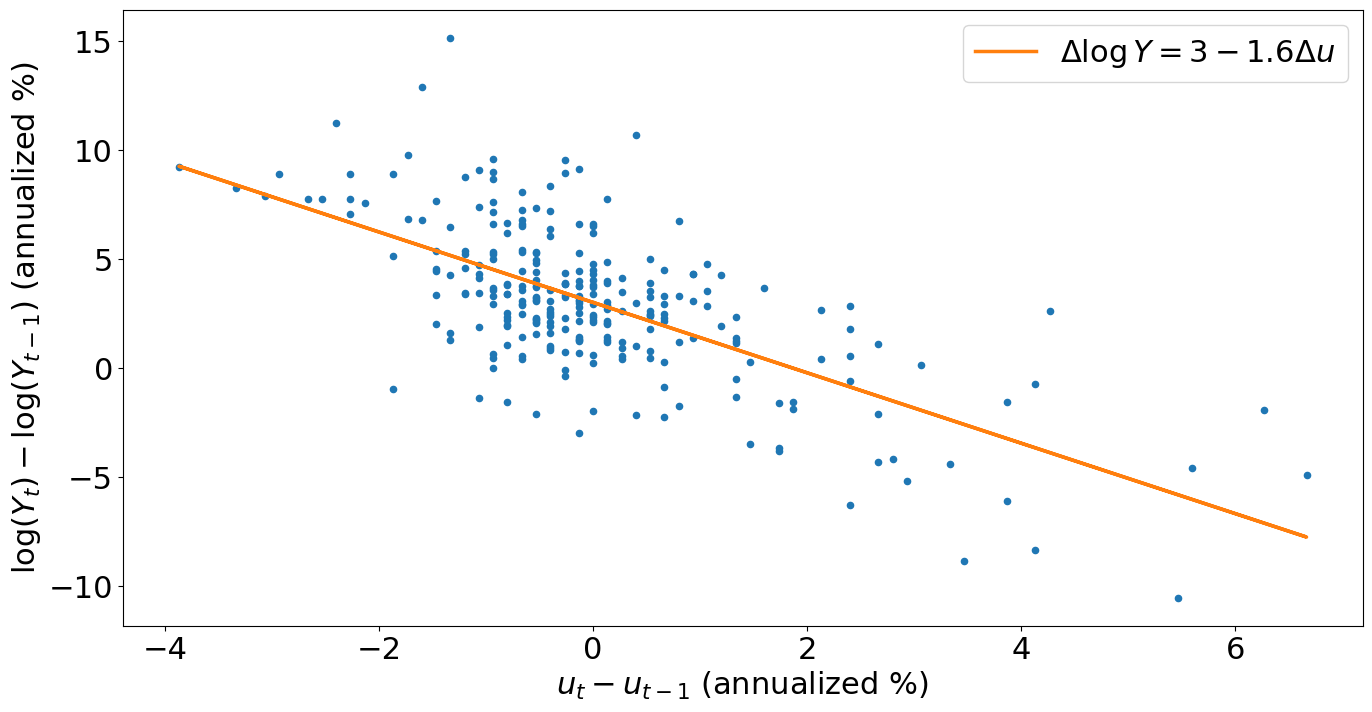

In [54]:
duy.plot.scatter(x='du', y='dy')
plt.plot(duy['du'], fitted, color='tab:orange', label=r'$\Delta \log Y = 3 - 1.6 \Delta u$')
plt.xlabel(r'$u_t - u_{t-1}$ (annualized %)')
plt.ylabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.legend()
############plt.savefig(f'Export/okun_cross_X.pdf', format='pdf', transparent=True);

So, best summary of Okun's law in data at the Q level is
$$ dlogy_t = 0.75 -1.6 du_t$$

This means that growth in y is $2.5\% - 1.6* change in u$ this year. 
- Annual level: unemployment rate changes this year (say from 7 to 10pp), the gdp growth rate tends to fall by 1.5*3=4.5pp (from 1.5 to -3)
- Longer period, tends to attenuate. Eg, unemployment rate in the recession frose from 4 to 10 (by 6), GDP growth rate fell from 3 to -3

                            OLS Regression Results                            
Dep. Variable:                     dc   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     261.2
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           1.60e-41
Time:                        20:27:23   Log-Likelihood:                -569.36
No. Observations:                 271   AIC:                             1143.
Df Residuals:                     269   BIC:                             1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5913      0.158     10.049      0.0

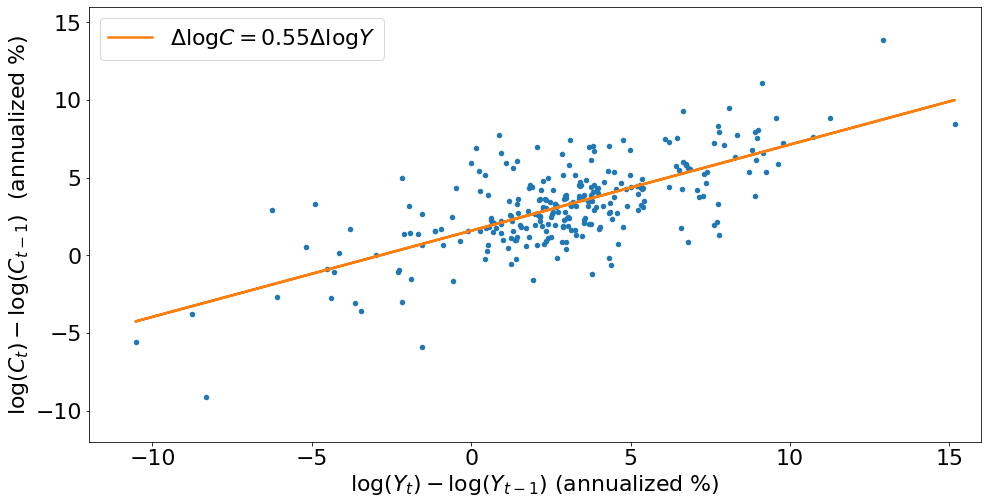

In [ ]:
fitted, regparams=reg_fit(duy['dc'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dc')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log C = 0.55 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(C_t)-\log(C_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
########plt.savefig(f'Export/okun_C_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     di   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     527.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.21e-65
Time:                        20:27:23   Log-Likelihood:                -993.13
No. Observations:                 271   AIC:                             1990.
Df Residuals:                     269   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.5124      0.756     -9.931      0.0

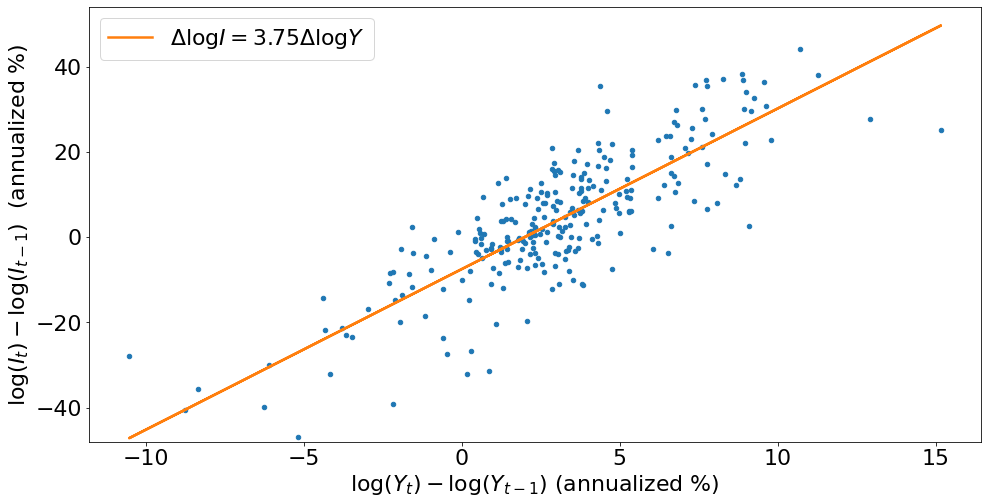

In [ ]:
fitted, regparams=reg_fit(duy['di'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='di')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log I = 3.75 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(I_t)-\log(I_{t-1})$  (annualized %)')
plt.legend()
plt.ylim(-12,16)
plt.ylim(-48,54)
########plt.savefig(f'Export/okun_I_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dg   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     17.34
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           4.21e-05
Time:                        20:27:24   Log-Likelihood:                -771.53
No. Observations:                 271   AIC:                             1547.
Df Residuals:                     269   BIC:                             1554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9219      0.334      2.761      0.0

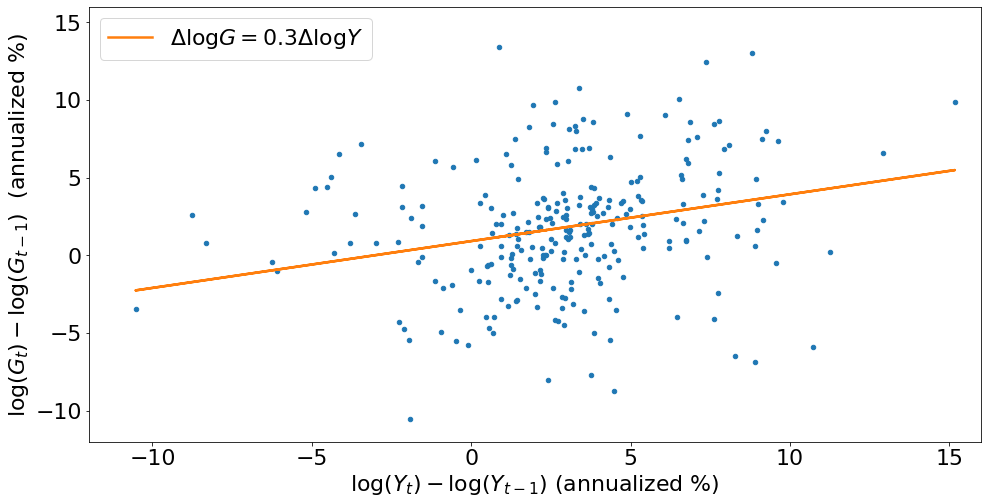

In [ ]:
fitted, regparams=reg_fit(duy['dg'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dg')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log G = 0.3 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(G_t)-\log(G_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
########plt.savefig(f'Export/okun_G_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dn   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     365.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           4.91e-52
Time:                        20:27:24   Log-Likelihood:                -568.36
No. Observations:                 271   AIC:                             1141.
Df Residuals:                     269   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5118      0.158     -3.244      0.0

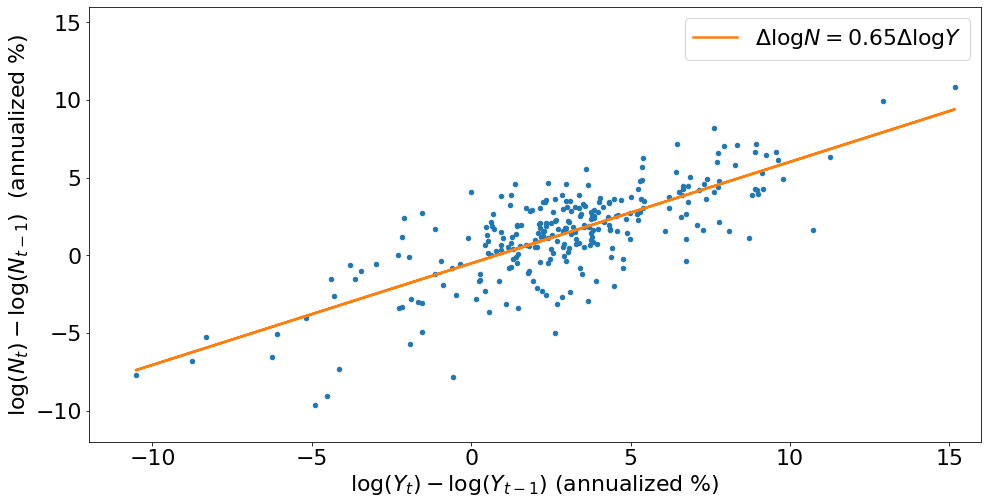

In [ ]:
fitted, regparams=reg_fit(duy['dn'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dn')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log N = 0.65 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(N_t)-\log(N_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
########plt.savefig(f'Export/okun_N_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     de   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           6.09e-40
Time:                        20:27:25   Log-Likelihood:                -527.81
No. Observations:                 271   AIC:                             1060.
Df Residuals:                     269   BIC:                             1067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3013      0.136      2.218      0.0

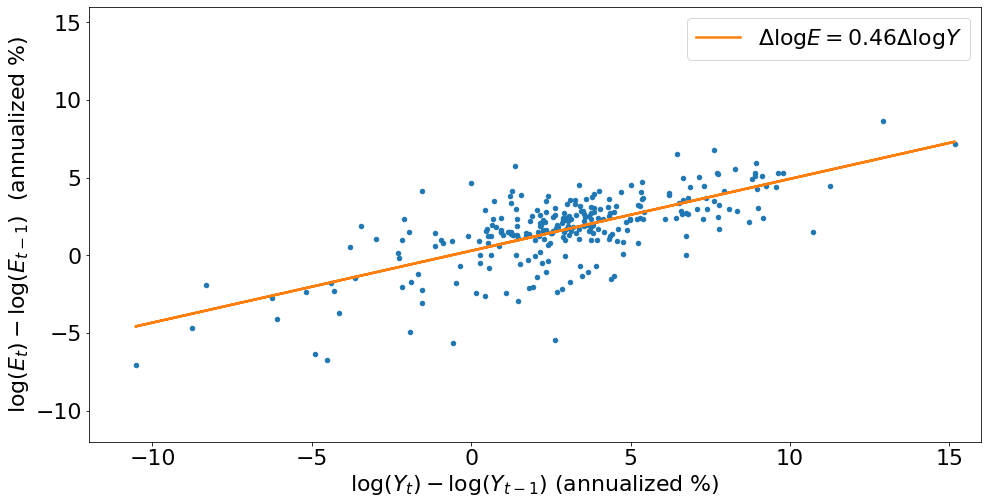

In [ ]:
fitted, regparams=reg_fit(duy['de'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='de')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log E = 0.46 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(E_t)-\log(E_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
########plt.savefig(f'Export/okun_E_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dh   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.62e-20
Time:                        20:27:25   Log-Likelihood:                -409.56
No. Observations:                 271   AIC:                             823.1
Df Residuals:                     269   BIC:                             830.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8130      0.088     -9.259      0.0

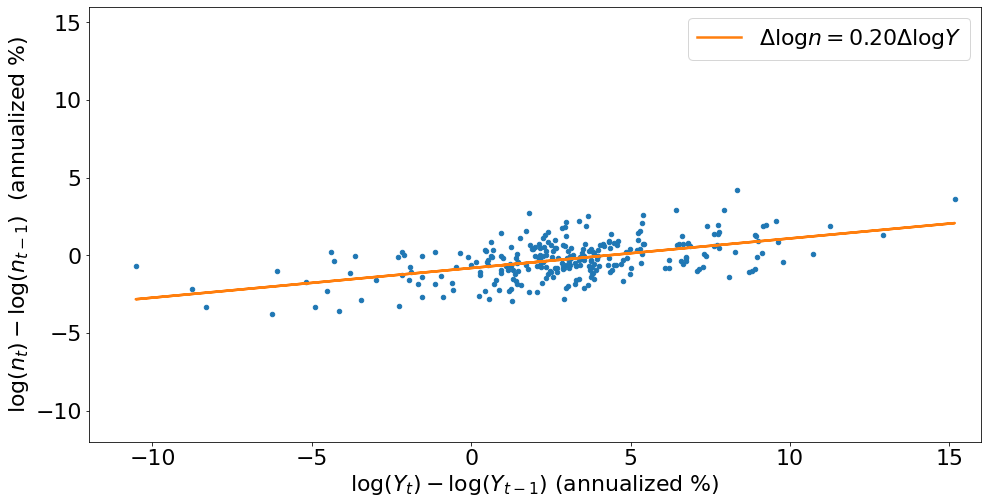

In [ ]:
fitted, regparams=reg_fit(duy['dh'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dh')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log n = 0.20 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(n_t)-\log(n_{t-1})$  (annualized %)')
plt.legend()
plt.xlim(-12,16)
plt.ylim(-12,16)
########plt.savefig(f'Export/okun_h_Y.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                     dk   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     37.65
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           3.02e-09
Time:                        20:27:25   Log-Likelihood:                -329.63
No. Observations:                 271   AIC:                             663.3
Df Residuals:                     269   BIC:                             670.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4153      0.065     36.941      0.0

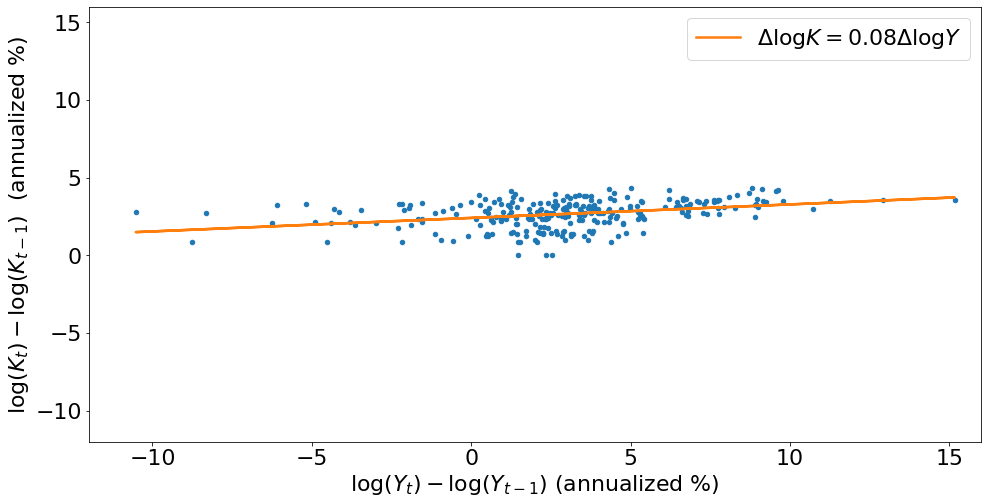

In [ ]:
fitted, regparams=reg_fit(duy['dk'],duy['dy'], verbose=True)
duy.plot.scatter(x='dy', y='dk')
plt.plot(duy['dy'], fitted, color='tab:orange', label=r'$\Delta \log K = 0.08 \Delta \log Y$')
plt.xlabel(r'$\log(Y_t)-\log(Y_{t-1})$ (annualized %)')
plt.ylabel(r'$\log(K_t)-\log(K_{t-1})$  (annualized %)')
plt.xlim(-12,16)
plt.ylim(-12,16)
plt.legend()
########plt.savefig(f'Export/okun_K_Y.pdf', format='pdf', transparent=True);

### Contributions to growth in each recession

Verify national accounting identity in original nominal series

In [55]:
series["sumyn"]=series["cn"]+series["in"]+series["gn"]+series["expn"]-series["impn"]
np.max((series["yn"]-series["sumyn"])/series["yn"])

2.946922970478305e-06

So this is accurate to the 6th digit

Do this at a monthly level and with the same deflator everywhere, so as to preserve adding up

In [56]:
seriesm = data_load.get_fred_data('M','same_def')

Check that we do add up all components

In [57]:
seriesm["sumyn"]=seriesm["cn"]+seriesm["in"]+seriesm["gn"]+seriesm["expn"]-seriesm["impn"]
np.max((seriesm["yn"]-seriesm["sumyn"])/seriesm["yn"])

3.6951228075291693e-06

Construct indicator = 1 if recession begins this month, -1 if it ends this month

In [58]:
seriesm["USREC"].loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    0.0
1948-12-31    1.0
1949-01-31    1.0
Freq: M, Name: USREC, dtype: float64

Note the official NBER [webpage](https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions) says that the peak was in November 1948 and trough in October 1949, so make sure our dating is consistent with that

In [59]:
begrec=seriesm["USREC"].diff().shift(-1)

In [60]:
begrec.loc['1948-10-31':'1949-01-31']

DATE
1948-10-31    0.0
1948-11-30    1.0
1948-12-31    0.0
1949-01-31    0.0
Freq: M, Name: USREC, dtype: float64

In [61]:
begrec.loc['1949-09-30':'1949-12-31']

DATE
1949-09-30    0.0
1949-10-31   -1.0
1949-11-30    0.0
1949-12-31    0.0
Freq: M, Name: USREC, dtype: float64

Now store beginning and ends

In [62]:
beg=seriesm.loc[(begrec==1).to_numpy()].rename(columns={"y":"y_start", "i":"i_start", "c":"c_start", "g":"g_start", "imp":"imp_start", "exp":"exp_start"})

In [63]:
end=seriesm.loc[(begrec==-1).to_numpy()].rename(columns={"y":"y_end", "i":"i_end", "c":"c_end", "g":"g_end", "imp":"imp_end", "exp":"exp_end"})

Add date to `end`

In [64]:
end["date_end"]=end.index

In [65]:
end['y_end']

DATE
1949-10-31     2257.294186
1954-05-31     2859.062085
1958-04-30     3141.284526
1961-02-28     3513.496029
1970-11-30     5348.142407
1975-03-31     5985.476179
1980-07-31     7181.784583
1982-11-30     7336.046678
1991-03-31    10003.830018
2001-11-30    14293.347165
2009-06-30    16307.206535
2020-04-30    19034.873917
Name: y_end, dtype: float64

In [66]:
startend=pd.concat([beg[["y_start","i_start", "c_start", "g_start", "imp_start", "exp_start"]],end[["y_end","i_end", "c_end", "g_end", "imp_end", "exp_end","date_end"]]])

In [67]:
startend.sort_index(inplace=True)

In [68]:
for i in ["y_end","i_end", "c_end", "g_end","imp_end", "exp_end", "date_end"]:
    startend[i]=startend[i].shift(-1)

In [69]:
startend.dropna(inplace=True)

In [70]:
startend.head()

,y_start,i_start,c_start,g_start,imp_start,exp_start,y_end,i_end,c_end,g_end,imp_end,exp_end,date_end
DATE,,,,,,,,,,,,,
1948-11-30,2281.954949,398.110580,1454.435495,387.142662,81.507167,123.773379,2257.294186,312.519810,1503.453165,416.298273,75.836183,100.850780,1949-10-31
1953-07-31,2902.723360,455.884535,1733.941822,716.993173,121.007717,116.911546,2859.062085,417.512166,1759.998525,678.896918,117.170525,119.829917,1954-05-31
1957-08-31,3226.253853,516.893549,1952.766465,730.985757,133.109826,158.720158,3141.284526,433.044925,1948.878536,756.232945,133.610649,136.745424,1958-04-30
1960-04-30,3498.286675,563.108554,2147.850262,765.371436,151.645439,173.595397,3513.496029,514.271074,2153.247502,810.679819,139.241182,174.538816,1961-02-28
1969-12-31,5303.186424,857.478892,3181.283350,1247.240797,270.449173,287.634245,5348.142407,844.438524,3228.397514,1258.288528,281.629127,298.646969,1970-11-30


In [71]:
startend["dy"]=100*(startend['y_end']-startend['y_start'])/startend['y_start']
startend["dc"]=100*(startend['c_end']-startend['c_start'])/startend['y_start']
startend["di"]=100*(startend['i_end']-startend['i_start'])/startend['y_start']
startend["dg"]=100*(startend['g_end']-startend['g_start'])/startend['y_start']
startend["dexp"]=100*(startend['exp_end']-startend['exp_start'])/startend['y_start']
startend["-dimp"]=-100*(startend['imp_end']-startend['imp_start'])/startend['y_start']
startend["sum"]=startend["dc"]+startend["di"]+startend["dg"]+startend["dexp"]+startend["-dimp"]

## Now show contribution to growth in each recession

In [72]:
startend[["date_end","dy","sum","dc","di","dg","dexp","-dimp"]].round(1)

,date_end,dy,sum,dc,di,dg,dexp,-dimp
DATE,,,,,,,,
1948-11-30,1949-10-31,-1.1,-1.1,2.1,-3.8,1.3,-1.0,0.2
1953-07-31,1954-05-31,-1.5,-1.5,0.9,-1.3,-1.3,0.1,0.1
1957-08-31,1958-04-30,-2.6,-2.6,-0.1,-2.6,0.8,-0.7,-0.0
1960-04-30,1961-02-28,0.4,0.4,0.2,-1.4,1.3,0.0,0.4
1969-12-31,1970-11-30,0.8,0.8,0.9,-0.2,0.2,0.2,-0.2
1973-11-30,1975-03-31,-2.4,-2.4,0.4,-4.2,0.8,0.8,-0.1
1980-01-31,1980-07-31,-2.2,-2.2,-0.6,-2.9,-0.1,0.1,1.3
1981-07-31,1982-11-30,-2.1,-2.1,1.6,-4.2,1.0,-1.6,1.1
1990-07-31,1991-03-31,-0.9,-0.9,-0.4,-1.6,0.4,0.3,0.5


### Now log and HP

Log and HP filter the series

In [73]:
filtseries = dict()
# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(series[r]),100)
    filtseries[r] = cycle

# just levels
for r in ['pce_infl', 'fedfunds', 'u']:
    filtseries[r] = series[r]/100


# verify units
df = pd.DataFrame(filtseries)
df.tail()

,y,c,g,i,gdpdef,emp,h,labprod,w,pce_infl,fedfunds,u
date,,,,,,,,,,,,
2019-12-31,0.023876,0.024112,0.004090,0.022695,0.000436,0.030984,0.001555,-0.006459,-0.017355,0.013,0.016433,0.036000
2020-03-31,0.010207,0.008382,0.007013,-0.001410,0.001351,0.040055,-0.003110,-0.019530,-0.008304,0.017,0.012600,0.038000
2020-06-30,-0.071680,-0.080678,0.020038,-0.155861,-0.006460,-0.078006,-0.016387,0.016864,0.031644,-0.008,0.000600,0.129667
2020-09-30,0.003065,0.004963,-0.003076,0.016549,-0.001461,-0.019091,0.001131,0.019773,-0.000044,0.031,0.000933,0.088333
2020-12-31,0.013247,0.018932,-0.015121,0.047701,0.001687,0.004198,0.007679,0.000350,0.008565,0.018,0.000900,0.067667


In [74]:
series

,yn,cn,gn,in,nxn,impn,expn,y,c,g,...,totres,ioer,dgs10,breakeven10,ypop,t,ylogfit,poplogfit,ypoplogfit,sumyn
date,,,,,,,,,,,,,,,,,,,,,
1952-03-31,359.820,212.969,84.998,58.132,3.721,14.958,18.679,2727.954,1565.288,1039.017,...,NaN,NaN,NaN,NaN,0.017429,0,7.987839,12.018954,-4.031116,359.820
1952-06-30,361.030,217.088,88.987,53.004,1.951,14.630,16.581,2733.800,1595.941,1074.374,...,NaN,NaN,NaN,NaN,0.017397,1,7.995475,12.021630,-4.026155,361.030
1952-09-30,367.701,219.553,90.931,57.220,-0.004,15.250,15.246,2753.517,1603.596,1085.214,...,NaN,NaN,NaN,NaN,0.017449,2,8.003112,12.024306,-4.021195,367.700
1952-12-31,380.812,227.670,93.418,60.737,-1.013,16.342,15.329,2843.941,1660.168,1103.302,...,NaN,NaN,NaN,NaN,0.017942,3,8.010748,12.026982,-4.016234,380.812
1953-03-31,387.980,231.220,95.764,61.663,-0.667,15.795,15.128,2896.811,1679.665,1138.261,...,NaN,NaN,NaN,NaN,0.018200,4,8.018384,12.029658,-4.011274,387.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,21902.390,14667.964,3865.345,3885.228,-516.146,3048.089,2531.943,20951.088,14093.877,3652.085,...,1613.533333,1.631522,1.791935,1.638548,0.063658,271,10.057292,12.744123,-2.686831,21902.391
2020-03-31,21706.513,14473.122,3943.653,3807.759,-518.021,2934.121,2416.101,20665.553,13862.295,3691.924,...,1847.166667,1.254396,1.365000,1.428226,0.062723,272,10.064928,12.746799,-2.681871,21706.514
2020-06-30,19913.143,13168.944,4021.065,3254.272,-531.137,2342.488,1811.351,19034.830,12668.716,3768.904,...,3071.600000,0.100000,0.687619,1.166508,0.057385,273,10.072564,12.749475,-2.676910,19913.144


## Plot some series vs trends

In [75]:
filtseries = dict()
seriespre=series.loc['1952-03-31':'2019-12-31']

# HP filters of logs
for r in ['y', 'c', 'g', 'i', 'gdpdef', 'emp', 'h','labprod', 'w']:
    cycle, trend= sm.tsa.filters.hpfilter(np.log(seriespre[r]),100)
    filtseries[r] = cycle

# verify units
filtseries = pd.DataFrame(filtseries)

Procyclical variables

Text(0.5, 1.0, 'Cyclical components of log Y, C, N')

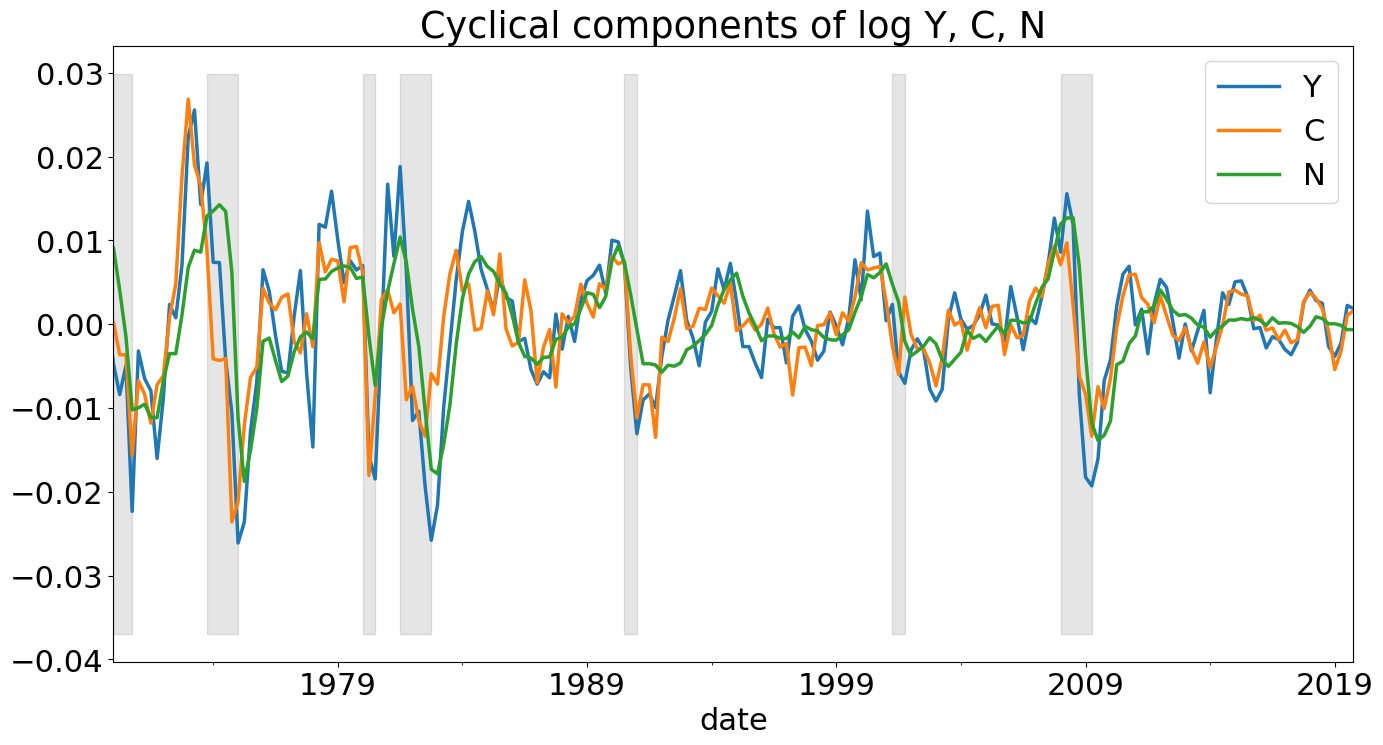

In [76]:
filtseries['y'].plot(label='Y')
filtseries['c'].plot(label='C')
filtseries['emp'].plot(label='N')
#filtseries['i'].plot(label='I')
yl, yh = plt.ylim()
plt.xlim('1970-03-31','2019-12-31')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('Cyclical components of log Y, C, N')
########plt.savefig(f'Export/us_log_realgdp_components.pdf', format='pdf', transparent=True);

### Historical CPI data

In [77]:
df_cpi = data_load.get_historical_cpi()

In [78]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1774]

33.09590792838875

In [79]:
df_cpi["cpi"][1933]

12.96

In [80]:
np.exp(3)

20.085536923187668

In [81]:
df_cpi["cpi"][2020]/df_cpi["cpi"][1933]

19.969907407407405

Text(0, 0.5, '$\\log(P_t/P_{0})$')

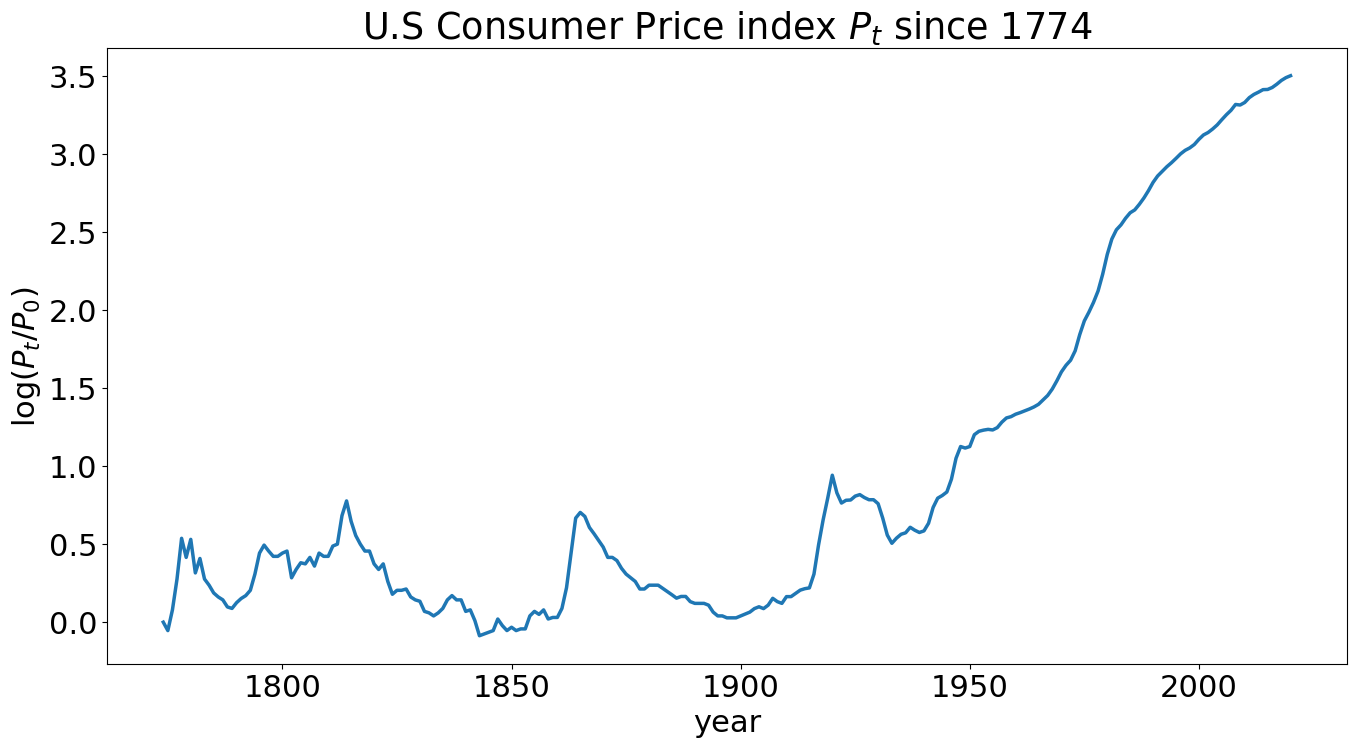

In [82]:
(np.log(df_cpi['cpi'])-np.log(df_cpi['cpi'][1774])).plot()
plt.title(r"U.S Consumer Price index $P_t$ since 1774")
plt.ylabel(r'$\log(P_t/P_{0})$')
########plt.savefig(f'Export/us_log_cpi.pdf', format='pdf', transparent=True);

In [83]:
np.exp(3.5)

33.11545195869231

Text(0, 0.5, '$100 \\Delta \\log(P_t)$')

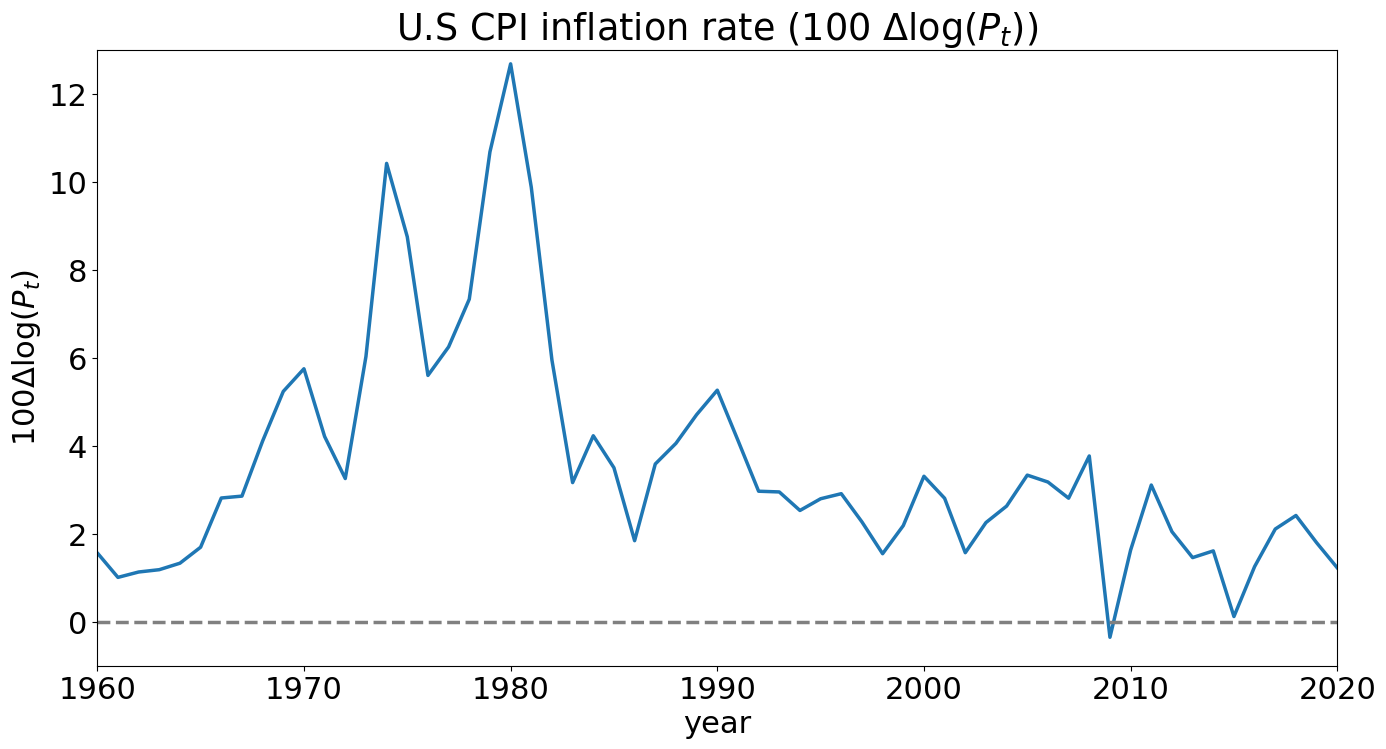

In [84]:
(100* np.log(df_cpi['cpi']).diff()).plot()
plt.title(r"U.S CPI inflation rate (100 $\Delta \log(P_t)$)")
plt.axhline(0, linestyle='--', color='gray')
plt.xlim(1960,2020)
plt.ylim(-1,13)
plt.ylabel(r'$100 \Delta \log(P_t)$')
#########plt.savefig(f'Export/us_log_infl.pdf', format='pdf', transparent=True);

In [85]:
series['cpi'].diff()

date
1952-03-31         NaN
1952-06-30    0.070000
1952-09-30    0.180000
1952-12-31    0.030000
1953-03-31   -0.076667
                ...   
2019-12-31    1.802667
2020-03-31    0.915333
2020-06-30   -2.487667
2020-09-30    2.924000
2020-12-31    1.805333
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [86]:
yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)

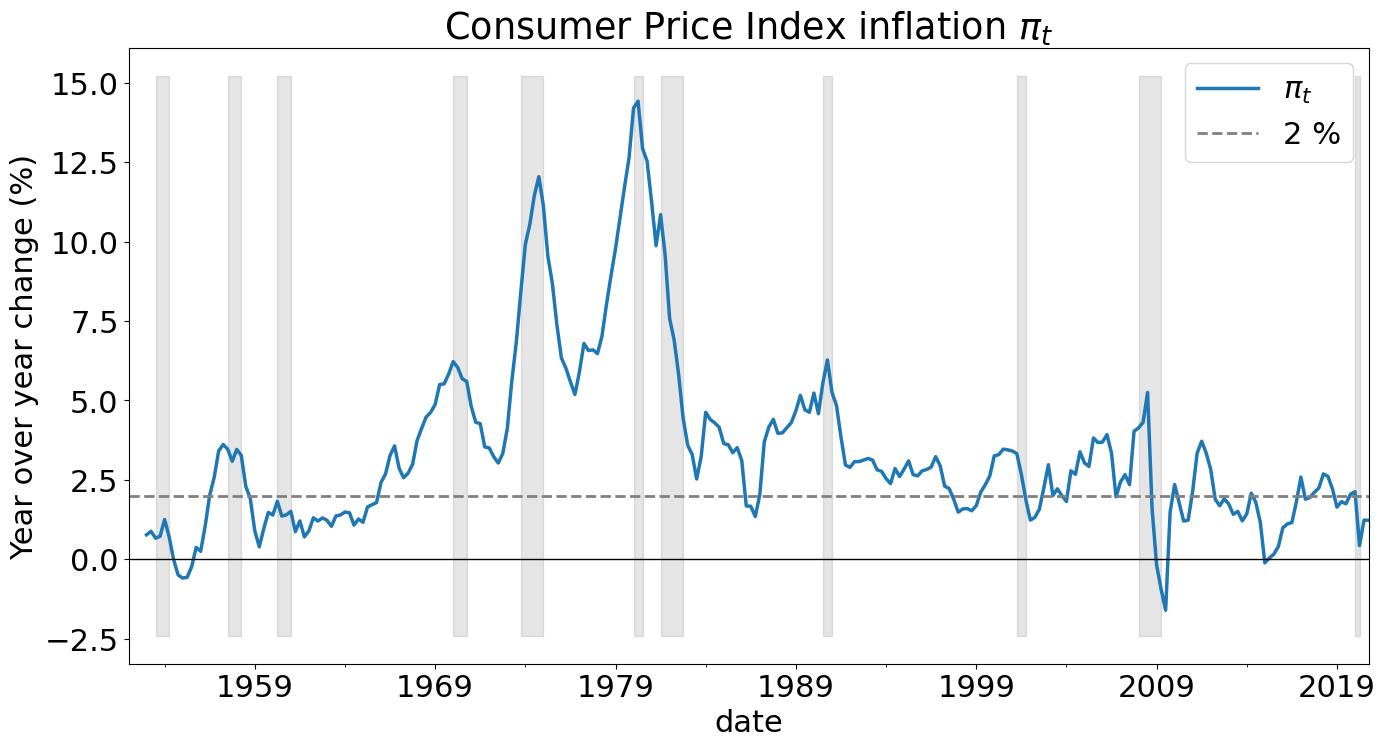

In [87]:
plt.figure
yoy.plot(label=r'$\pi_t$')
yl, yh = plt.ylim()
plt.title(r'Consumer Price Index inflation $\pi_t$')
plt.ylabel(r'Year over year change (%)')
plt.axhline(2, linestyle='--', color='gray', linewidth=2, label=r'2 %')
plt.legend()
plt.axhline(0, color='black', linewidth=1)
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
########plt.savefig(f'Export/us_infl.pdf', format='pdf', transparent=True);

### Money

In [88]:
m1data=series[['m2','m1', 'currcir','USREC','cpi', 'yn']]['2000-01':]

Levels

Text(0, 0.5, '$trn')

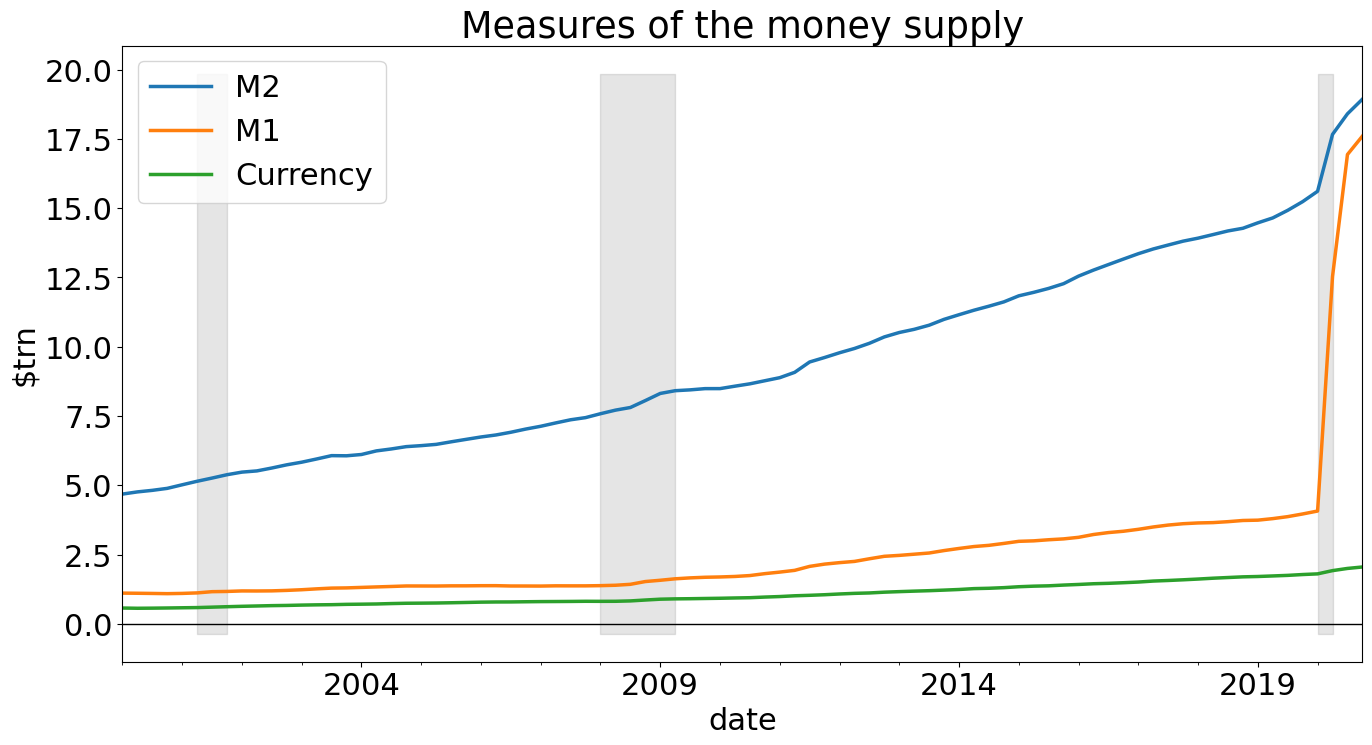

In [89]:
plt.figure()
(m1data['m2']/1000).plot(label='M2')
(m1data['m1']/1000).plot(label='M1')
(m1data['currcir']/1000).plot(label='Currency')
plt.axhline(0, color='black', linewidth=1)
yl, yh = plt.ylim()
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.legend()
plt.title(r'Measures of the money supply')
plt.ylabel(r'$trn')
########plt.savefig(f'Export/us_m1.pdf', format='pdf', transparent=True);

In [90]:
m1data['2020-03':]

,m2,m1,currcir,USREC,cpi,yn
date,,,,,,
2020-03-31,15608.333333,4073.666667,1807.014667,0.333333,258.803000,21706.513
2020-06-30,17660.133333,12532.800000,1924.159667,0.333333,256.315333,19913.143
2020-09-30,18403.200000,16934.766667,2003.012667,0.000000,259.239333,21647.640
2020-12-31,18930.933333,17597.866667,2055.453333,0.000000,261.044667,22024.502


<Axes: xlabel='date'>

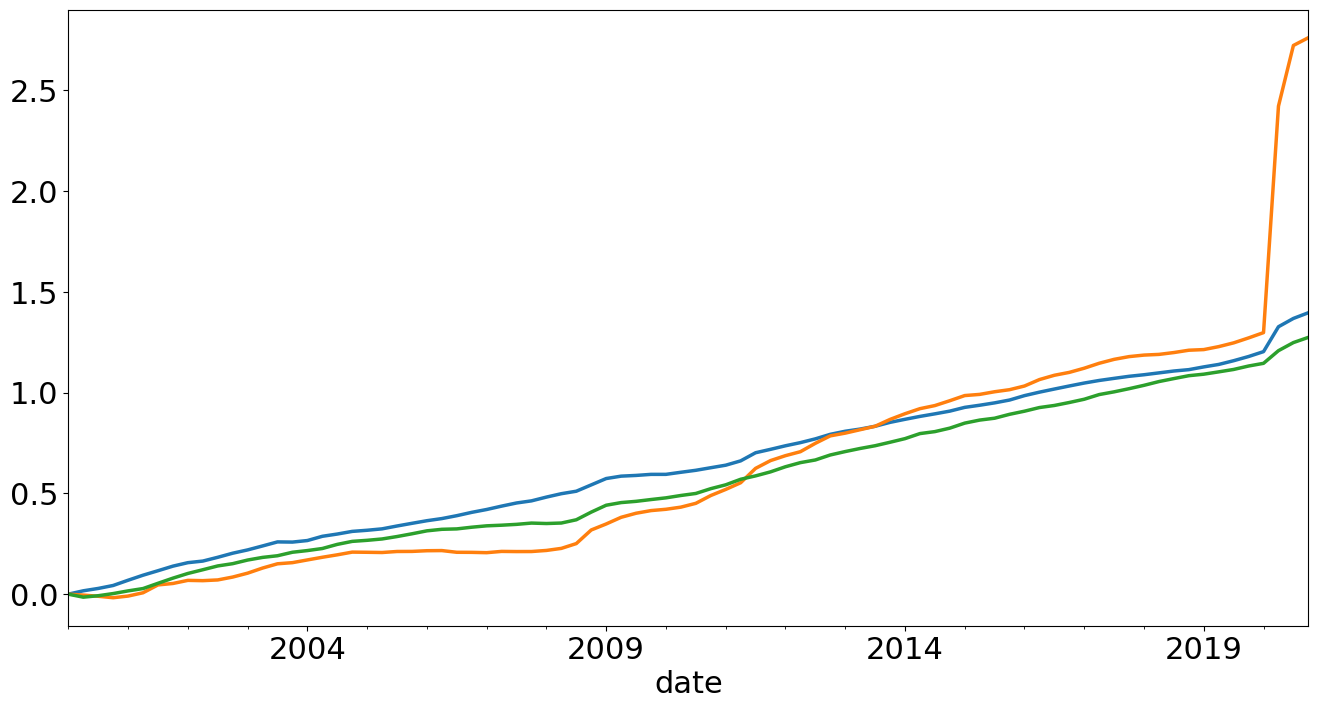

In [91]:
plt.figure()
(np.log(m1data['m2'])-np.log(m1data['m2'][0])).plot(label='M2')
(np.log(m1data['m1'])-np.log(m1data['m1'][0])).plot(label='M1')
(np.log(m1data['currcir'])-np.log(m1data['currcir'][0])).plot(label='curr')
#(m1data['m1']/1000).plot(label='M1')
#(m1data['currcir']/1000).plot(label='Currency')

Annualized growth rate

In [92]:
NQ1=m1data.index.size 

In [93]:
print('Annualized log growth rate M2 =',(np.log(m1data['m2'][-1])-np.log(m1data['m2'][0]))/(NQ1/4))
print('Annualized log growth rate M1 =',(np.log(m1data['m1'][-1])-np.log(m1data['m1'][0]))/(NQ1/4))
print('Annualized log growth rate curr =',(np.log(m1data['currcir'][-1])-np.log(m1data['currcir'][0]))/(NQ1/4))
print('Annualized log growth rate prices =',(np.log(m1data['cpi'][-1])-np.log(m1data['cpi'][0]))/(NQ1/4))
print('Annualized log growth rate GDP =',(np.log(m1data['yn'][-2])-np.log(m1data['yn'][0]))/((NQ1-1)/4))

Annualized log growth rate M2 = 0.06649402072116428
Annualized log growth rate M1 = 0.13147420150866862
Annualized log growth rate curr = 0.06067406298079109
Annualized log growth rate prices = 0.020395477615836505
Annualized log growth rate GDP = 0.03720932396728267


In [94]:
m1data

,m2,m1,currcir,USREC,cpi,yn
date,,,,,,
2000-03-31,4685.266667,1112.733333,574.842667,0.000000,170.100000,10002.179
2000-06-30,4763.933333,1107.700000,566.301000,0.000000,171.433333,10247.720
2000-09-30,4820.033333,1101.133333,570.402000,0.000000,173.000000,10318.165
2000-12-31,4891.500000,1093.233333,576.533333,0.000000,174.233333,10435.744
2001-03-31,5020.600000,1102.266667,584.237333,0.000000,175.900000,10470.231
...,...,...,...,...,...,...
2019-12-31,15234.566667,3967.933333,1783.115333,0.000000,257.887667,21902.390
2020-03-31,15608.333333,4073.666667,1807.014667,0.333333,258.803000,21706.513
2020-06-30,17660.133333,12532.800000,1924.159667,0.333333,256.315333,19913.143


### Reserves

Text(0.5, 1.0, 'Bank reserves ($M_t^{res}$)')

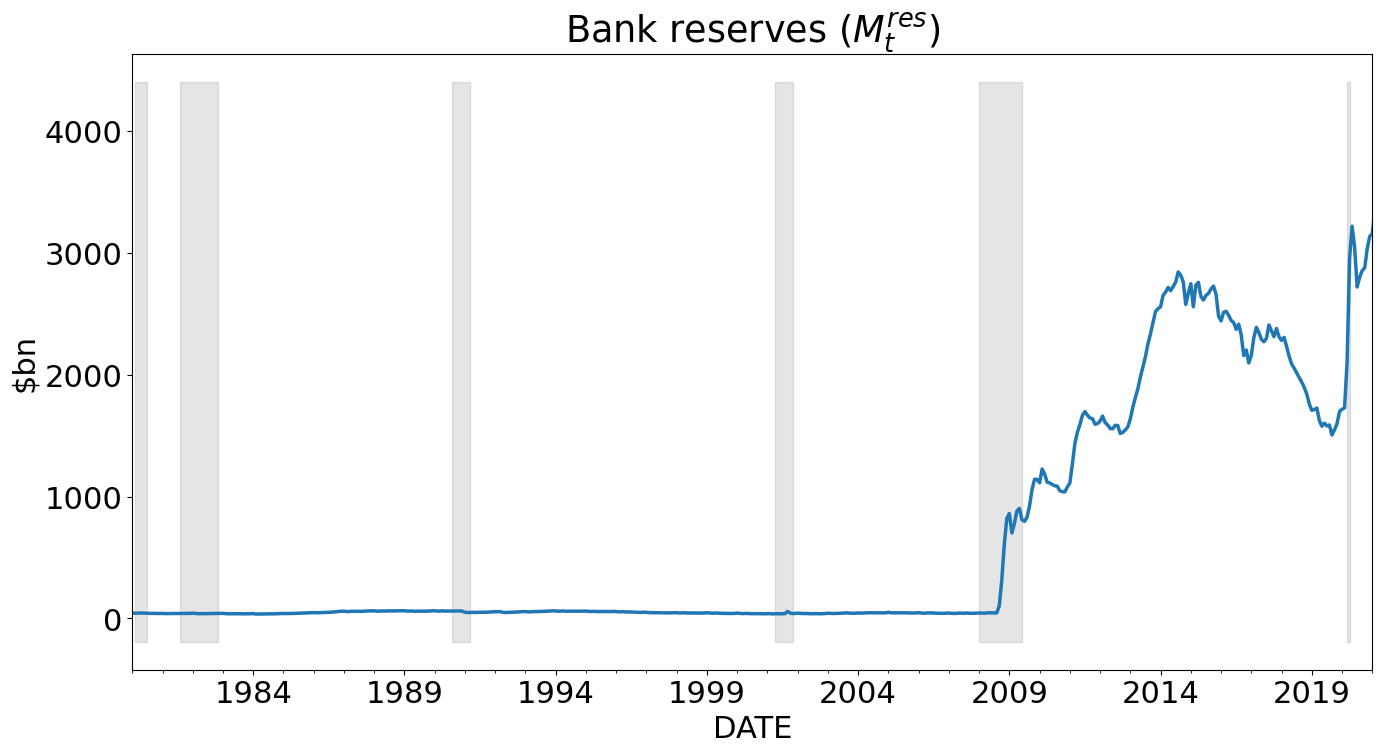

In [95]:
seriesm['totres'].plot()
yl, yh = plt.ylim()
plt.ylabel('$bn')
# Draw shaded for recession
plt.fill_between(seriesm.index, yl, yh, where=seriesm['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Bank reserves ($M_t^{res}$)')
########plt.savefig(f'Export/reserves.pdf', format='pdf', transparent=True);

Replace IOER series with 0s

In [96]:
seriesm['ioer'].fillna(0, inplace=True)

Text(0.5, 1.0, 'Interest rates')

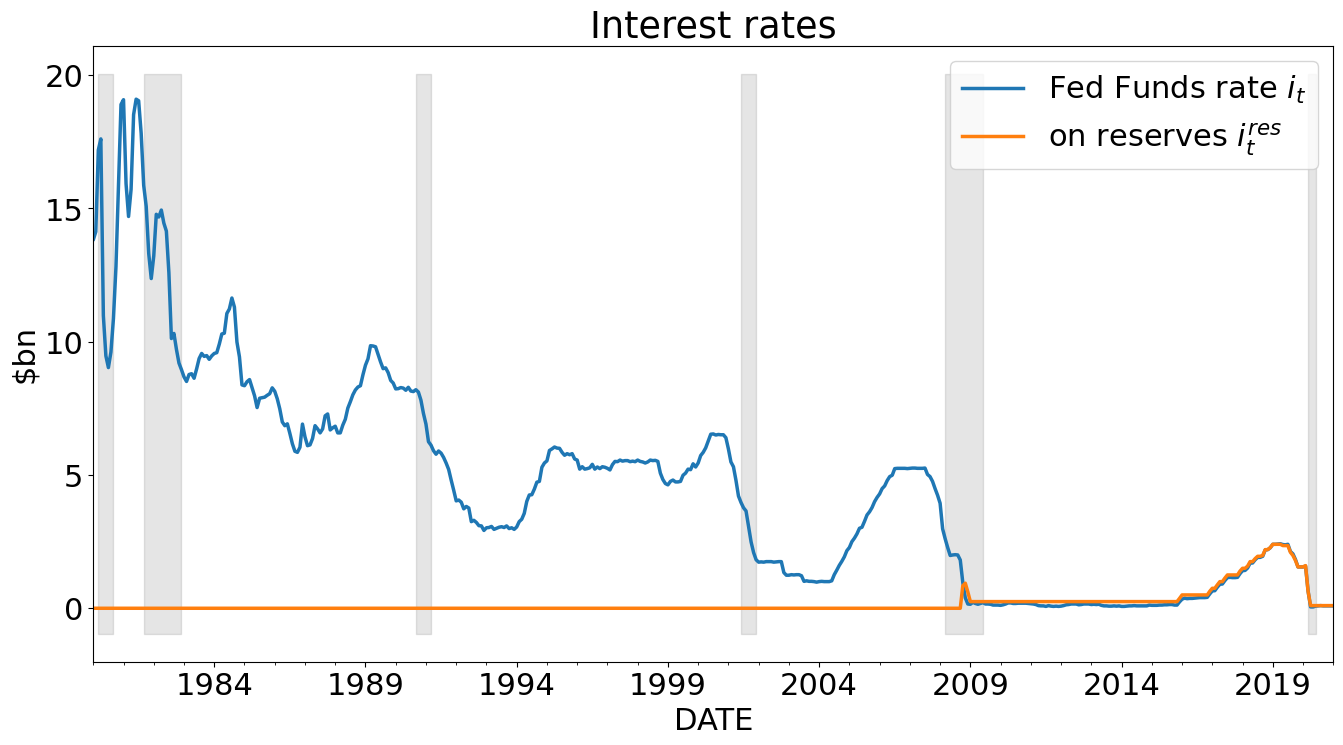

In [97]:
seriesm['fedfunds'].plot(label=r'Fed Funds rate $i_t$')
seriesm['ioer'].plot(label=r'on reserves $i_t^{res}$')
yl, yh = plt.ylim()
plt.ylabel('$bn')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.xlim('1980-01-01','2021-01-01')
plt.title(r'Interest rates')
########plt.savefig(f'Export/intrates.pdf', format='pdf', transparent=True);

### Output gap

Text(0.5, 1.0, 'U.S. real GDP ($Y_t$) vs potential ($Y_t^{pot}$)')

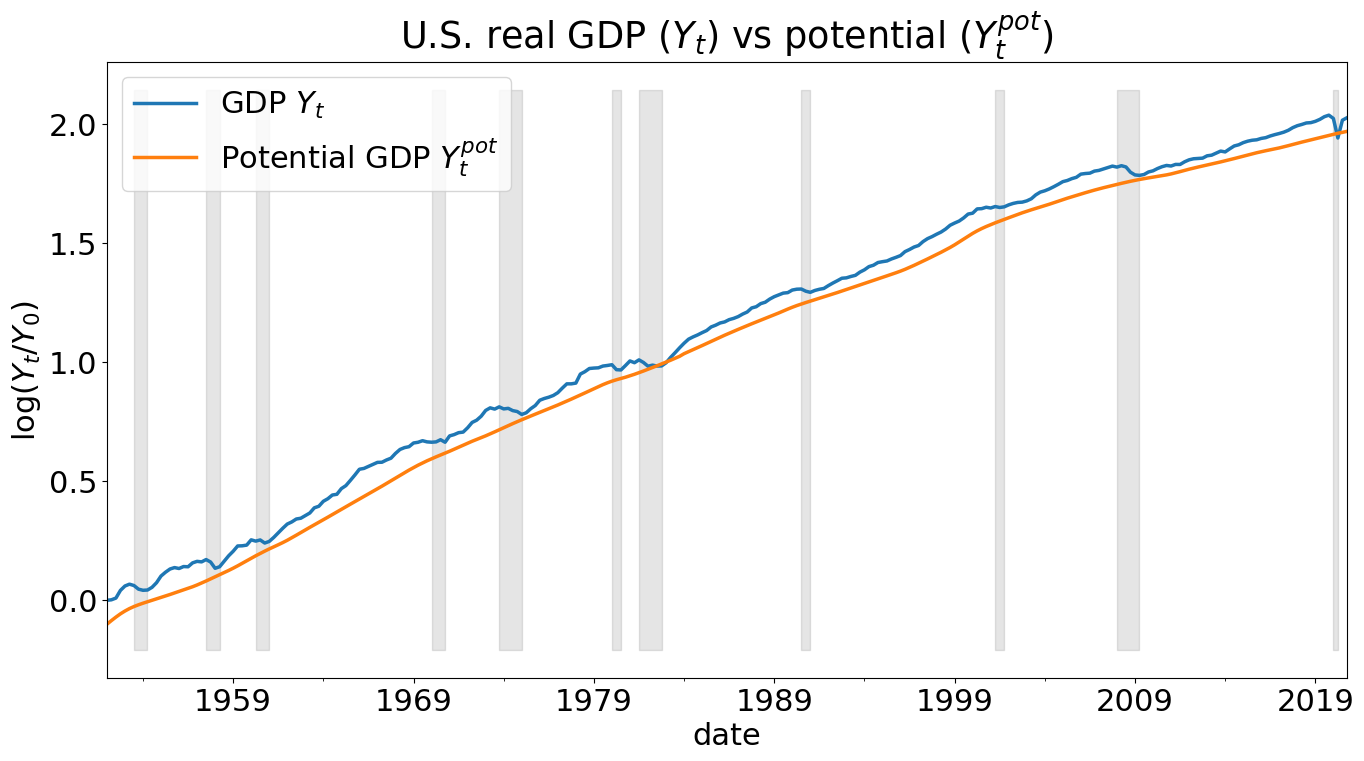

In [98]:
(np.log(series['y'])-np.log(series['y'][0])).plot(label='GDP $Y_t$')
(np.log(series['ypot'])-np.log(series['y'][0])).plot(label='Potential GDP $Y_t^{pot}$')
yl, yh = plt.ylim()
plt.legend()
plt.ylabel(r'$\log(Y_t/Y_{0})$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP ($Y_t$) vs potential ($Y_t^{pot}$)')
########plt.savefig(f'Export/gdp_v_potential.pdf', format='pdf', transparent=True);

Text(0.5, 1.0, 'U.S. output gap $log(Y_t/Y_t^{pot})$')

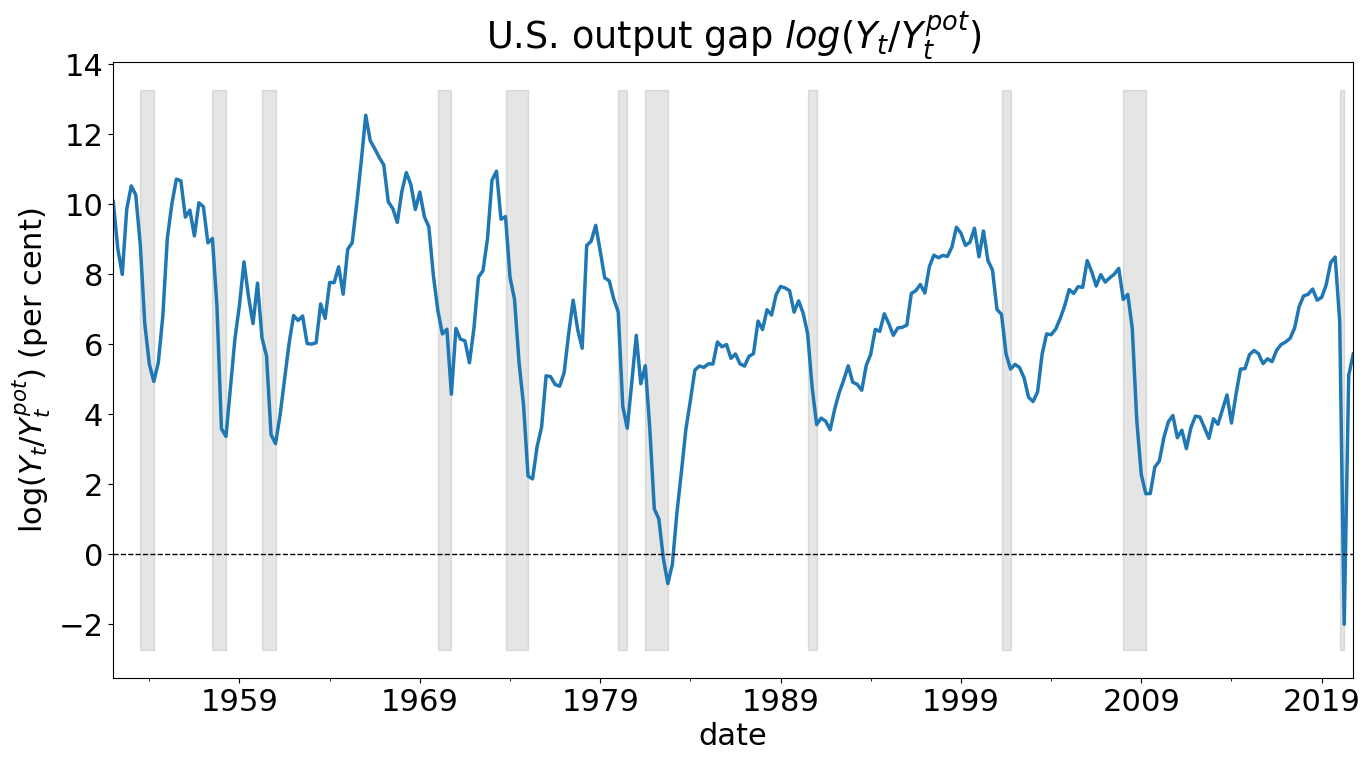

In [99]:
(100*(np.log(series['y'])-np.log(series['ypot']))).plot()
yl, yh = plt.ylim()
plt.ylabel(r'$\log(Y_t/Y_{t}^{pot})$ (per cent)')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('U.S. output gap $log(Y_t/Y_t^{pot})$')
########plt.savefig(f'Export/outputgap.pdf', format='pdf', transparent=True);

Phillips curve examination

In [100]:
series['cpi']

date
1952-03-31     26.416667
1952-06-30     26.486667
1952-09-30     26.666667
1952-12-31     26.696667
1953-03-31     26.620000
                 ...    
2019-12-31    257.887667
2020-03-31    258.803000
2020-06-30    256.315333
2020-09-30    259.239333
2020-12-31    261.044667
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [101]:
pi_yoy=100*(series['cpi']-series['cpi'].shift(4))/series['cpi'].shift(4)
pidiff=pi_yoy.diff(4) # change in inflation over the previous year!
ygap=(100*(series['y']-series['ypot'])/series['ypot'])
pi_qd=pi_yoy-0.5*pi_yoy.shift(-4)

In [102]:
pi_qd

date
1952-03-31         NaN
1952-06-30         NaN
1952-09-30         NaN
1952-12-31         NaN
1953-03-31    0.143620
                ...   
2019-12-31    1.436365
2020-03-31         NaN
2020-06-30         NaN
2020-09-30         NaN
2020-12-31         NaN
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [103]:
pidiff

date
1952-03-31         NaN
1952-06-30         NaN
1952-09-30         NaN
1952-12-31         NaN
1953-03-31         NaN
                ...   
2019-12-31   -0.165065
2020-03-31    0.485173
2020-06-30   -1.382308
2020-09-30   -0.515926
2020-12-31   -0.824277
Freq: Q-DEC, Name: cpi, Length: 276, dtype: float64

In [104]:
df=pd.DataFrame(data={'pi':pi_yoy[9:-4],'pidiff':pidiff[9:-4], 'ygap':ygap[9:-4], 'pi_qd':pi_qd[9:-4]})
df.corr()

,pi,pidiff,ygap,pi_qd
pi,1.000000,0.323835,-0.068133,0.892386
pidiff,0.323835,1.000000,0.431097,0.230461
ygap,-0.068133,0.431097,1.000000,-0.230093
pi_qd,0.892386,0.230461,-0.230093,1.000000


In [105]:
df

,pi,pidiff,ygap,pi_qd
date,,,,
1954-06-30,0.711078,-0.169869,5.056307,0.995978
1954-09-30,-0.012418,-0.674918,5.624376,0.105565
1954-12-31,-0.495847,-1.220033,7.038794,-0.682717
1955-03-31,-0.593619,-1.845810,9.441915,-0.718028
1955-06-30,-0.569801,-1.280878,10.509878,-1.093035
...,...,...,...,...
2018-12-31,2.213519,0.105738,7.520817,1.189292
2019-03-31,1.641387,-0.607231,7.607829,0.578107
2019-06-30,1.811480,-0.875313,7.988445,1.596894


In [106]:
df['label']=df.index.year

In [107]:
df

,pi,pidiff,ygap,pi_qd,label
date,,,,,
1954-06-30,0.711078,-0.169869,5.056307,0.995978,1954
1954-09-30,-0.012418,-0.674918,5.624376,0.105565,1954
1954-12-31,-0.495847,-1.220033,7.038794,-0.682717,1954
1955-03-31,-0.593619,-1.845810,9.441915,-0.718028,1955
1955-06-30,-0.569801,-1.280878,10.509878,-1.093035,1955
...,...,...,...,...,...
2018-12-31,2.213519,0.105738,7.520817,1.189292,2018
2019-03-31,1.641387,-0.607231,7.607829,0.578107,2019
2019-06-30,1.811480,-0.875313,7.988445,1.596894,2019


Version in levels

                            OLS Regression Results                            
Dep. Variable:                     pi   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.217
Date:                Wed, 03 Jan 2024   Prob (F-statistic):              0.271
Time:                        14:41:22   Log-Likelihood:                -642.99
No. Observations:                 263   AIC:                             1290.
Df Residuals:                     261   BIC:                             1297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0390      0.498      8.108      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '$\\pi_t$  (annualized %)')

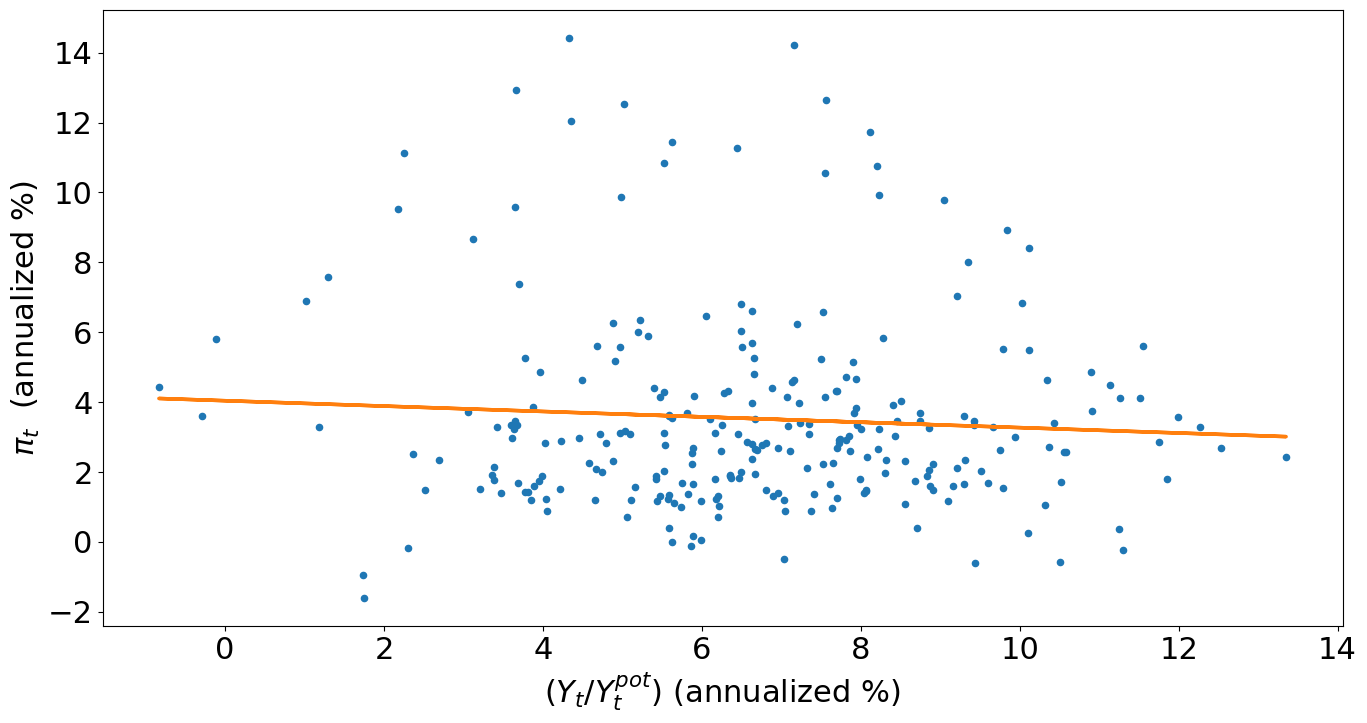

In [108]:
fitted, regparams=reg_fit(df['pi'],df['ygap'], verbose=True)
df.plot.scatter(x='ygap', y='pi')
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t/Y_t^{pot})$ (annualized %)')
plt.ylabel(r'$\pi_t$  (annualized %)')
#plt.legend()
#plt.xlim(-12,16)
#plt.ylim(-12,16)

                            OLS Regression Results                            
Dep. Variable:                 pidiff   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     59.58
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           2.51e-13
Time:                        14:41:22   Log-Likelihood:                -507.16
No. Observations:                 263   AIC:                             1018.
Df Residuals:                     261   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1376      0.297     -7.192      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '$\\pi_t - \\pi_{t-1}$  (annualized %)')

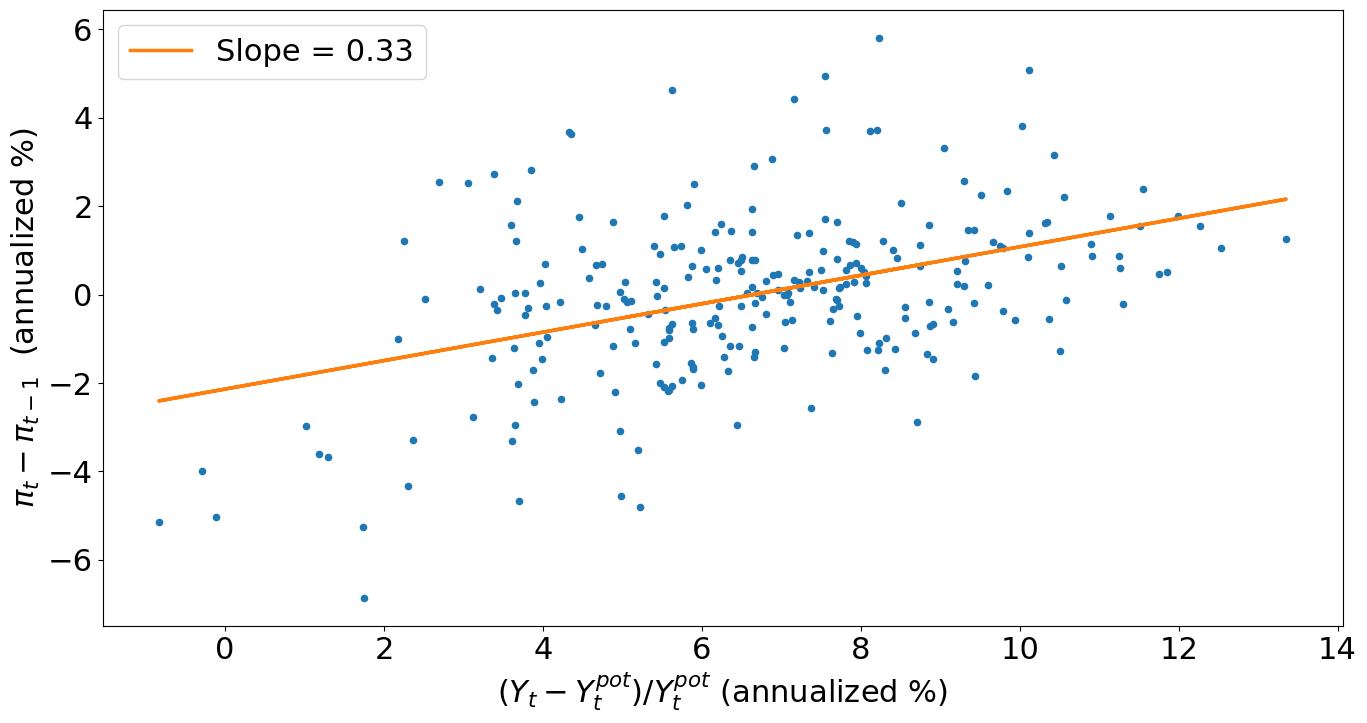

In [109]:
fitted, regparams=reg_fit(df['pidiff'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pidiff')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
# Bottom left are 1982 and 2009. Top right are 
plt.plot(df['ygap'], fitted, color='tab:orange', label='Slope = 0.33')
plt.legend()
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t-1}$  (annualized %)')
########plt.savefig(f'Export/phillipscurvedelta.pdf', format='pdf', transparent=True);

                            OLS Regression Results                            
Dep. Variable:                  pi_qd   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     14.59
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           0.000167
Time:                        14:41:23   Log-Likelihood:                -537.40
No. Observations:                 263   AIC:                             1079.
Df Residuals:                     261   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9461      0.333      8.836      0.0

/Users/awellman/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, '$\\pi_t - \\pi_{t+1}$  (annualized %)')

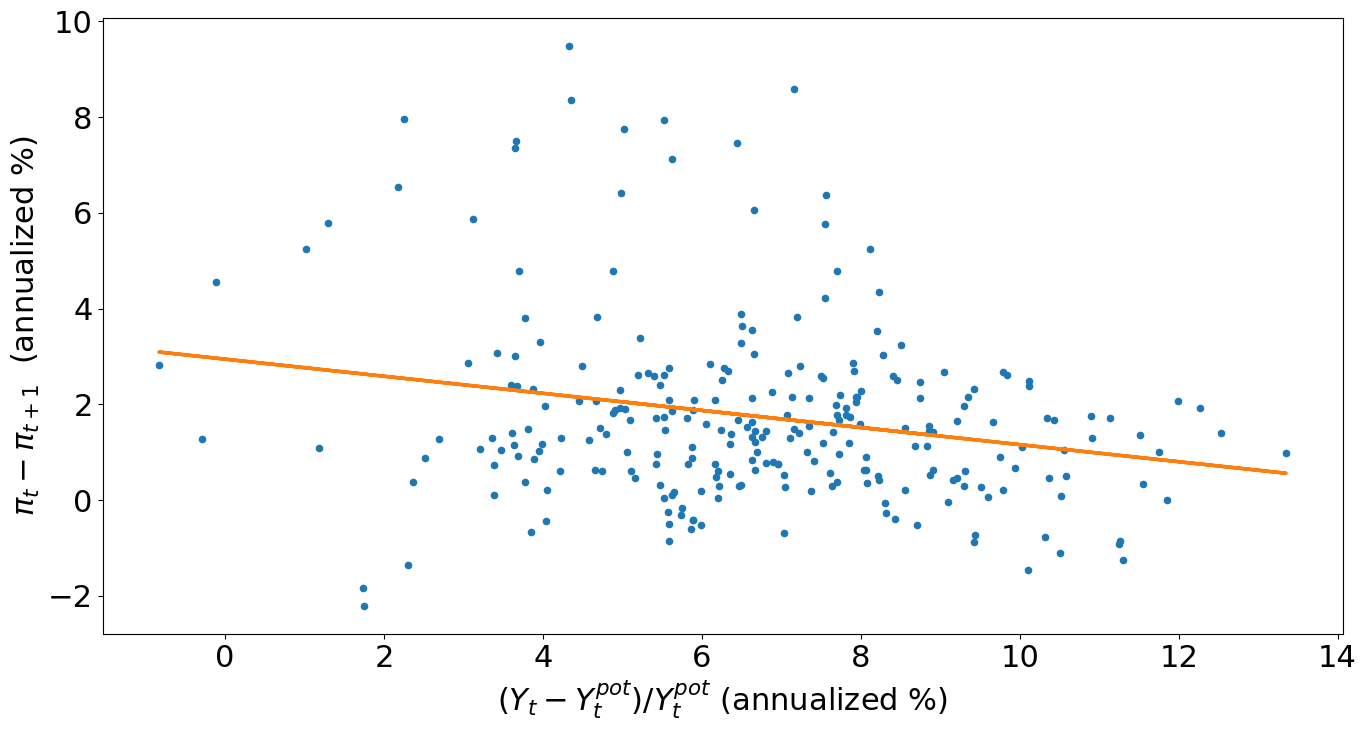

In [110]:
fitted, regparams=reg_fit(df['pi_qd'],df['ygap'], verbose=True)
ax=df.plot.scatter(x='ygap', y='pi_qd')
# if I want to label the dates
#df[['ygap','pidiff','label']].apply(lambda x: ax.text(*x),axis=1)
plt.plot(df['ygap'], fitted, color='tab:orange')
plt.xlabel(r'$(Y_t-Y_t^{pot})/Y_t^{pot}$ (annualized %)')
plt.ylabel(r'$\pi_t - \pi_{t+1}$  (annualized %)')

Really jumps at you that the data likes the actual difference version much better than the QD version

In [111]:
seriesd = data_load.get_fred_data('D','same_def')
seriesd=seriesd.loc['2014-01-01':'2021-03-12']

Get recession indicator for whole period

In [112]:
seriesd['USREC'].interpolate(method='linear', inplace=True)
seriesd['dgs10'].interpolate(method='linear', inplace=True)
seriesd['breakeven10'].interpolate(method='linear', inplace=True)

Text(0.5, 1.0, 'US 10-year Treasury Rate')

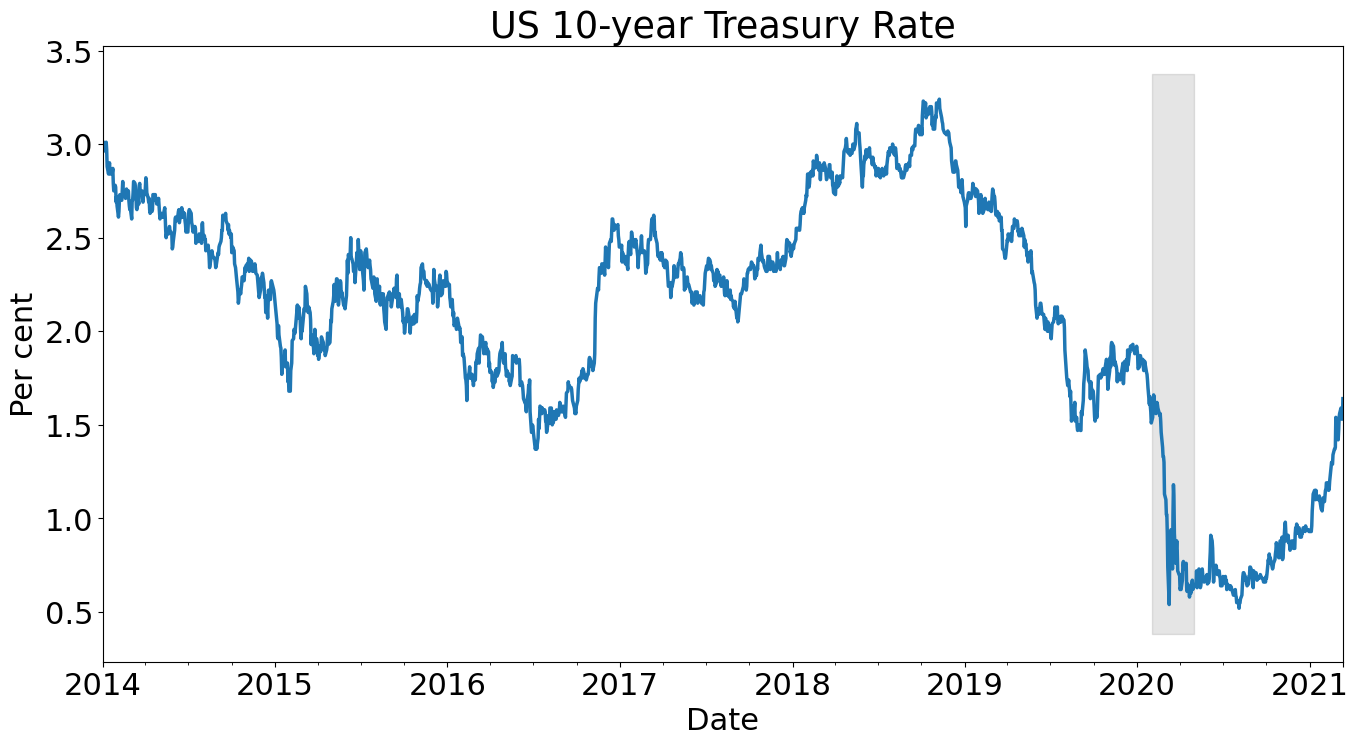

In [113]:
seriesd['dgs10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Treasury Rate')
########plt.savefig(f'Export/treasury10year.pdf', format='pdf', transparent=True);

Text(0.5, 1.0, 'US 10-year Breakeven Inflation rate')

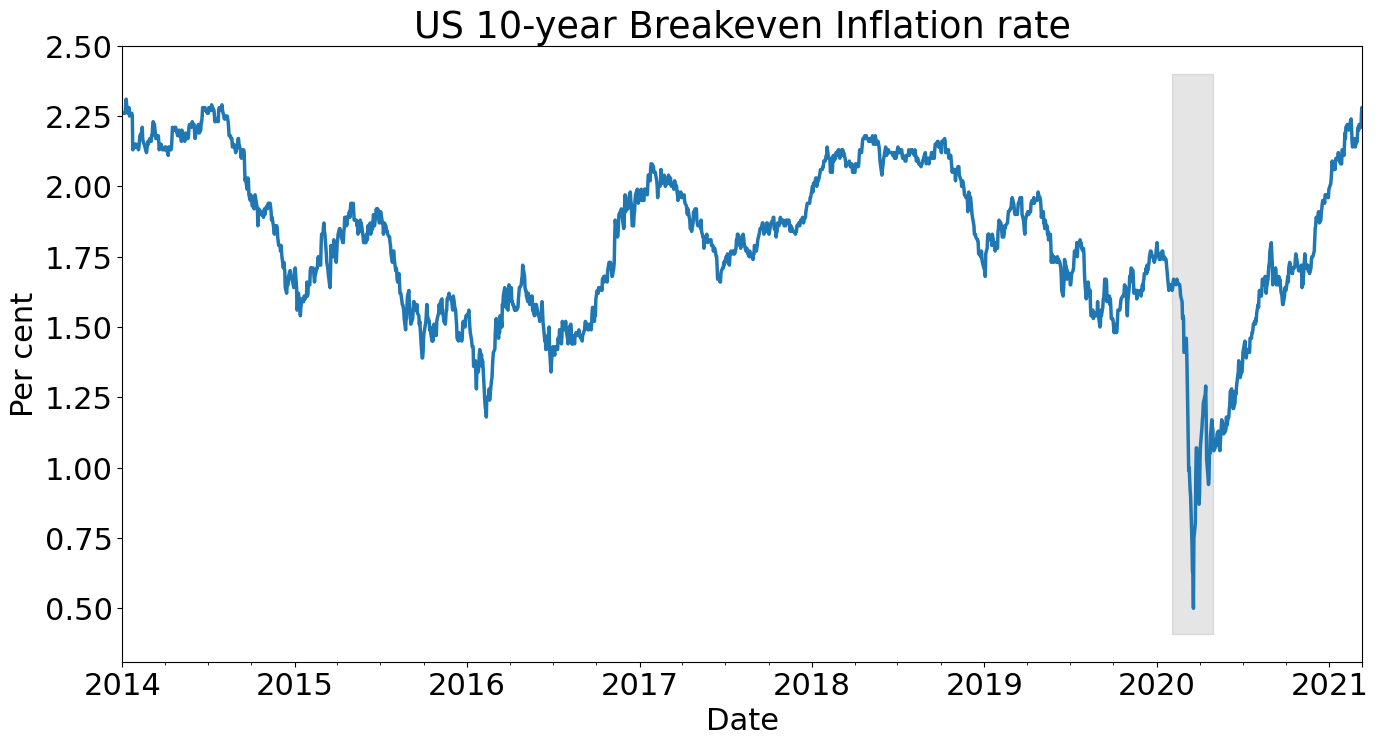

In [114]:
seriesd['breakeven10'].plot()
# Draw shaded for recession
yl,yh=plt.ylim()
plt.fill_between(seriesd.index, yl, yh, where=seriesd['USREC'].values, color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Per cent')
plt.title('US 10-year Breakeven Inflation rate')
########plt.savefig(f'Export/breakeven10year.pdf', format='pdf', transparent=True);